# Overview: 
## Our purpose is to build a Machine Learning model that can accurately predict apartment prices in the capital city of Romania.   





# Exploratory Data Analysis (EDA)

After scraping records from a popular real estate website in Romania, the analysis stage may begin. Let us first take a look at the dataset. This set of data contains many features that could impact change in apartment prices. It is fitting to make an attempt at explaining everything starting from the nature of the data, up until positive/negative relations between each existing feature. After clearly understanding how collected data behaves, and making vital changes (cleaning the data where necessary), the creation of a machine learning model can proceed. 

**Why should data be thoroughly inspected before fitting a model to it?** Since the aim of this project is to predict a given feature as accurately as possible, it is only appropriate to ensure the data is a good match for our model.

In [16]:
from ipyleaflet import Map, Marker, MarkerCluster, AwesomeIcon, Heatmap, CircleMarker
from geopy.geocoders import Nominatim
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

The **pandas library** allows for ideal comprehensive use of data. We shall create a **'DataFrame' object** (a structured way of representing datasets in pandas) and read the 'csv' (comma separated values) file which holds the extracted information. We would also like to see all of the existing columns, and ensure that if we change something in the dataset, we do it on a copy, so as to not negatively affect the true dataset which might prove useful later in time. 

In [2]:
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)
df = pd.read_csv(r'C:\Users\Calin\Desktop\Personal-Project\WebScraping\apartamente2.csv')
df_copy = df.copy()

Let's look at the size of the dataset. Using one of the many functions that pandas provides, **the exact number of rows and columns is shown.**

In [3]:
df_copy.shape

(9943, 20)

To get a quick glance on the **first 5 values** of the dataframe, pandas comes to aid once again.

In [4]:
df_copy.head()

,Unnamed: 0,Nr camere,Suprafata utila,Suprafata utila totala,Suprafata construita,Compartimentare,Confort,Etaj,Nr. bucatarii,Nr. bai,An constructie,Structura rezistenta,Tip imobil,Regim inaltime,Nr. garaje,Nr. locuri parcare,Nr. balcoane,Latitudine:,Longitudine:,Pret
0,0,2.0,67,87.0,NaN,decomand,1,Etaj 2 / 4,1.0,1.0,2020,beton,bloc de apartamente,P+4E,NaN,1,2,44.411854,26.014669,35.800
1,1,1.0,35,NaN,NaN,decomand,1,Etaj 1 / 4,1.0,1.0,1974,NaN,bloc de apartamente,P+4E,NaN,NaN,NaN,44.422995,26.015135,43.500
2,2,3.0,131,NaN,NaN,NaN,1,Parter / 5,1.0,1.0,2020,beton,bloc de apartamente,P+5E,NaN,1,NaN,44.412061,26.014722,81.000
3,3,2.0,65,65.0,65,decomand,1,Etaj 1 / 5,1.0,1.0,2020,beton,bloc de apartamente,P+5E,NaN,NaN,1 (închise),44.411047,26.015002,42.400
4,4,1.0,52,52.0,68,decomand,lux,Etaj 10 / 10,1.0,1.0,2016,beton,bloc de apartamente,S+P+10E,NaN,NaN,1 (închise),44.407490,25.989381,43.500


Should we opt for a different approach to checking records, another pandas function allows for **randomized observations** to appear as a result of a provided number. 

In [5]:
df_copy.sample(50)

,Unnamed: 0,Nr camere,Suprafata utila,Suprafata utila totala,Suprafata construita,Compartimentare,Confort,Etaj,Nr. bucatarii,Nr. bai,An constructie,Structura rezistenta,Tip imobil,Regim inaltime,Nr. garaje,Nr. locuri parcare,Nr. balcoane,Latitudine:,Longitudine:,Pret
359,359,3.0,74,NaN,85,decomand,1,Etaj 1 / 3,NaN,2.0,2021 (in constructie),beton,bloc de apartamente,P+3E,NaN,NaN,1,44.417903,26.190310,83.400
8164,8164,3.0,150,NaN,NaN,decomand,lux,Parter / 3,NaN,3.0,2005,NaN,bloc de apartamente,P+3E,NaN,NaN,NaN,44.482208,26.088214,430.000
3720,3720,1.0,36,40.00,45,decomand,1,Etaj 1 / 5,1.0,1.0,2021 (in constructie),beton,bloc de apartamente,S+P+5E,NaN,1,1 (închise),44.364317,26.117378,40.000
957,957,2.0,55,55.00,NaN,decomand,1,Etaj 6 / 10,1.0,1.0,2019,beton,bloc de apartamente,S+P+10E,NaN,NaN,1,44.434560,25.992127,57.000
1712,1712,2.0,"58,54",58.54,"71,38",decomand,lux,Etaj 3 / 11,1.0,1.0,2021 (in constructie),beton,bloc de apartamente,S+P+11E,NaN,NaN,1,44.446256,26.036116,83.500
949,949,2.0,41,NaN,54,decomand,1,Etaj 1 / 9,1.0,1.0,2020,beton,bloc de apartamente,P+9E,NaN,NaN,1,44.407945,25.988049,36.900
1309,1309,2.0,"64,35",64.35,"77,55",decomand,lux,Etaj 3 / 6,1.0,1.0,2021 (in constructie),beton,bloc de apartamente,S+P+6E,NaN,NaN,1,44.412377,26.182919,74.500
2386,2386,1.0,34,NaN,45,decomand,1,Parter / 8,NaN,1.0,1980,beton,bloc de apartamente,P+8E,NaN,NaN,NaN,44.380050,26.106050,38.900
3057,3057,1.0,"43,75",47.37,"58,35",semidecomand,lux,Etaj 1 / 8,1.0,1.0,NaN,beton,bloc de apartamente,S+P+8E,NaN,NaN,1,44.483951,26.109148,72.500
4300,4300,2.0,63,NaN,70,decomand,1,Etaj 7 / 8,1.0,1.0,1994,beton,bloc de apartamente,P+8E,NaN,NaN,3,44.428859,26.119534,135.000


It appears as though the **first column simply shows the position of each row.** This is due to the data being inside of a DataFrame before becoming a 'csv' file. Besides the fact that this type of information is not useful in any way, it may also be detrimental to our model, so dropping the column from the dataframe is how we treat this issue.

In [6]:
df_copy.drop('Unnamed: 0', inplace=True, axis=1)

Moreover, useful information about our data can further be deducted, such as **existing columns, the number of values that are not null** (the null values are empty cells, regarded as missing values), **and also the data type of each variable.** As observed, the dataset contains both numerical values (int64, float64) and either text or mixed numeric or non-numeric values (object). Columns containing numbers are the numerical (quantitative) variables of the dataset, while information presented by a certain category is regarded as a categorical (qualitative) variable, just as the name states.

In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9943 entries, 0 to 9942
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nr camere               9942 non-null   float64
 1   Suprafata utila         9881 non-null   object 
 2   Suprafata utila totala  3523 non-null   float64
 3   Suprafata construita    8889 non-null   object 
 4   Compartimentare         9670 non-null   object 
 5   Confort                 9657 non-null   object 
 6   Etaj                    9942 non-null   object 
 7   Nr. bucatarii           8373 non-null   float64
 8   Nr. bai                 9460 non-null   float64
 9   An constructie          9765 non-null   object 
 10  Structura rezistenta    7414 non-null   object 
 11  Tip imobil              9901 non-null   object 
 12  Regim inaltime          9707 non-null   object 
 13  Nr. garaje              505 non-null    float64
 14  Nr. locuri parcare      2480 non-null   

By taking a closer look at the 17 columns and their data types, it can be observed that most features do not match their given 'Dtypes'. This happens because typos and other different scenarios alter the records. As a result, let us transform them acordingly and provide proper reasoning.


**1. Nr camere**

'Nr camere' (number of rooms) is the first variable in our dataset. It has 1 value  that is missing. As observed, its Dtype is float64. My initial thought was to convert it from float64 to integer64. However, by the looks of things, when missing values appear inside of a float64 data type column and a conversion  of the data type to interger takes place, the transformation occurs in both the actual values and missing values. This is problematic, as values different from 'NaN' raise errors in the proceeding stages of the analysis. Considering this, the final decision was to leave 'Nr camere' as is.

**2. Suprafata utila**

'Suprafata utila' (usable area) contains some missing values and its data type is object. Since all the records are numbers, why is it not of float data type?. The character ',' appears insead of '.'. European countries use ',' when '.' is expected and vice versa. This explaines why the website had used ',' compared to '.' and why float is the default data type for the column.
The only change made was the conversion of ',' to '.'.


**3. Suprafata utila totala**
'Suprafata utila totala' (total usable area) differs from 'Suprafata utila' (usable area) 












It appears that the column contains both ',' and '.', thus turning it into 'object' data type. Moreover, it even has values with the character '.' appearing 2 times.


is what I chose to leave the '.' as they are simply because they will appear as outliers, allowing for an appropriate way to handle. The ',' was converted to '.'.





**5. Compartimentare**

'Compartimentare' (partitioning) is the first categorical variable we encouterer which specifies whether the apartment is detached, semidetached or circular.




In [8]:
# Suprafata utila
bool_series_utila = df_copy['Suprafata utila'].str.contains(',')
nump_array_utila = np.where(bool_series_utila, df_copy['Suprafata utila'].str.replace(',', '.'), df_copy['Suprafata utila'])
df_copy['Suprafata utila'] = pd.DataFrame(nump_array_utila)
df_copy['Suprafata utila'] = df_copy['Suprafata utila'].astype('float64')


# Suprafata construita
bool_series_construita = df_copy['Suprafata construita'].str.contains(',')
nump_array_construita = np.where(bool_series_construita, df_copy['Suprafata construita'].str.replace(',', '.'), df_copy['Suprafata construita'])
df_copy['Suprafata construita'] = pd.DataFrame(nump_array_construita)
bool_series_construita_2 = df_copy['Suprafata construita'].str.contains('\d\d\.\d\d\d\.', regex = True)
nump_array_construita_2 = np.where(bool_series_construita_2, df_copy['Suprafata construita'].str.replace('.', ''), df_copy['Suprafata construita'])
df_copy['Suprafata construita'] = pd.DataFrame(nump_array_construita_2)
df_copy['Suprafata construita'] = df_copy['Suprafata construita'].astype('float64')


# Etaj
lst_etaj = list()
for item in df_copy['Etaj']:
    item = str(item)
    result = re.sub('/\s\d+', '', item)
    lst_etaj.append(result)
df_copy['Etaj'] = pd.DataFrame(lst_etaj, columns = ['Etaj'])


# Nr. locuri parcare
lst_locuri_parcare = list()
for item in df_copy['Nr. locuri parcare']:
    item = str(item)
    result = re.sub(r'-\sI.*', '', item)
    lst_locuri_parcare.append(result)
df_copy['Nr. locuri parcare'] = pd.DataFrame(lst_locuri_parcare, columns = ['Nr. locuri parcare'])
df_copy['Nr. locuri parcare'] = df_copy['Nr. locuri parcare'].astype('float64')


#Pret 
bool_series_pret = df_copy['Pret'].str.contains('.\d*', regex = True)
nump_array_pret = np.where(bool_series_pret, df_copy['Pret'].str.replace('.', ''), df_copy['Pret'])
df_copy['Pret'] = pd.DataFrame(nump_array_pret)
df_copy['Pret'] = df_copy['Pret'].astype('float64')

In [9]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9943 entries, 0 to 9942
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nr camere               9942 non-null   float64
 1   Suprafata utila         9881 non-null   float64
 2   Suprafata utila totala  3523 non-null   float64
 3   Suprafata construita    8889 non-null   float64
 4   Compartimentare         9670 non-null   object 
 5   Confort                 9657 non-null   object 
 6   Etaj                    9943 non-null   object 
 7   Nr. bucatarii           8373 non-null   float64
 8   Nr. bai                 9460 non-null   float64
 9   An constructie          9765 non-null   object 
 10  Structura rezistenta    7414 non-null   object 
 11  Tip imobil              9901 non-null   object 
 12  Regim inaltime          9707 non-null   object 
 13  Nr. garaje              505 non-null    float64
 14  Nr. locuri parcare      2480 non-null   

In [10]:
BUC_LAT = 44.4268
BUC_LON = 26.1025

basic_map = Map(center=[BUC_LAT, BUC_LON],zoom=10)
geolocator = Nominatim(user_agent="myGeocoder")

icon = AwesomeIcon(
    name='home',
    marker_color='green',
    icon_color='black',
    spin=False
)

lst = list()

for index, row in df.iterrows():
    marker = Marker(icon=icon, location=[row['Latitudine:'], row['Longitudine:']], draggable=False)
    lst.append(marker)
    location = geolocator.reverse([row['Latitudine:'], row['Longitudine:']])
    print(index, location)


marker_cluster = MarkerCluster(markers=lst)
basic_map.add_layer(marker_cluster)

0 38-40, Prelungirea Ghencea, Ghencea, Sector 6, Municipiul București, 061696, România
1 Bl. A44B, Aleea Dealul Măcinului, Drumul Taberei, Sector 6, Municipiul București, 062045, România
2 38-40, Prelungirea Ghencea, Ghencea, Sector 6, Municipiul București, 061696, România
3 Cimitirul Sf. Ilie, Strada Floare de Gheață, Ghencea, Sector 6, Municipiul București, 052834, România
4 45, Prelungirea Ghencea, Sector 6, Bragadiru, 052838, România
5 18, Intrarea Gliei, Aviației, Sector 1, Municipiul București, 014142, România
6 5, Șoseaua Pipera, Aviației, Sector 1, Municipiul București, 014262, România
7 Aviației Tower, 2D, Bulevardul Dimitrie Pompeiu, Sector 2, Municipiul București, 020337, România
8 1A, Strada Zăgazului, Aviației, Sector 1, Municipiul București, 014262, România
9 Chiajna, Ilfov, 061128, România
10 Gealan România, 612-614, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 061129, România
11 630D, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București,

97 One Tower, Calea Floreasca, Floreasca, Sector 1, Municipiul București, 014467, România
98 59, Strada Trotușului, Domenii, Sector 1, Municipiul București, 012142, România
99 96U, Șoseaua Nordului, Aviației, Sector 1, Municipiul București, 014135, România
100 Clubul Diplomaților, 2 B, Șoseaua București-Ploiești, Sector 1, Municipiul București, 013691, România
101 La Brasserie Bistro & Lounge, 7-9, Șoseaua Nordului, Sector 1, Municipiul București, 014101, România
102 Drumul Roții, Militari, Chiajna, Municipiul București, Ilfov, 061128, România
103 Aleea Lacul Morii, Militari, Sector 6, Municipiul București, 061097, România
104 Bl. F18, Aleea Dorohoi, Berceni, Sector 4, Municipiul București, 041675, România
105 Olga Gudynn School, Strada Serghei Vasilievici Rahmaninov, Floreasca, Sector 2, Municipiul București, 020276, România
106 383, Șoseaua Berceni, Sector 4, Municipiul București, 041839, România
107 4, Strada Firidei, Titan - Balta Albă, Sector 3, Municipiul București, 031745, Român

199 Celofibrei, Șoseaua Alexandriei, Rahova, Bragadiru, Ilfov, 00808, România
200 Sector 1, Municipiul București, 012329, România
201 94A, Drumul Gura Siriului, Titanul Nou, Sector 3, Municipiul București, 032601, România
202 25 A, Strada Mărului, Titan - Balta Albă, Sector 3, Municipiul București, 032316, România
203 Strada Weiner Palada, Chiajna, Dudu, Ilfov, 77041, România
204 11, Intrarea Floare Galbenă, Sector 6, Bragadiru, 052838, România
205 Titanul Nou, Sector 3, Municipiul București, 032621, România
206 Porsche Pipera, Bulevardul Pipera, Voluntari, Ilfov, 020337, România
207 Porsche Pipera, Bulevardul Pipera, Voluntari, Ilfov, 020337, România
208 Porsche Pipera, Bulevardul Pipera, Voluntari, Ilfov, 020337, România
209 Porsche Pipera, Bulevardul Pipera, Voluntari, Ilfov, 020337, România
210 Drumul Gura Crivățului, Titanul Nou, Sector 3, Municipiul București, 032621, România
211 Titanul Nou, Sector 3, Municipiul București, 032544, România
212 11, Drumul Gura Făgetului, Titanul N

296 Apărătorii Patriei, Sector 4, Municipiul București, 042142, România
297 Lidl, 63, Strada Moinești, Militari, Sector 6, Municipiul București, 61233, România
298 Drumul Gura Crivățului, Titanul Nou, Sector 3, Municipiul București, 032267, România
299 Bl. 1, 89 bl1, Strada Rezervelor, Militari Residence, Chiajna, Roșu, Ilfov, 077040, România
300 Bl. V34, Calea Vitan, Vitan, Sector 3, Municipiul București, 031282, România
301 219, Splaiul Unirii, Sector 3, Municipiul București, 030136, România
302 Strada Weiner Palada, Chiajna, Dudu, Ilfov, 77041, România
303 Titanul Nou, Sector 3, Municipiul București, 032621, România
304 Popești-Leordeni, Ilfov, 077160, România
305 Austrotherm, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 061101, România
306 34, Strada Victor Brauner, Titanul Nou, Sector 3, Municipiul București, 032621, România
307 Titanul Nou, Sector 3, Municipiul București, 032544, România
308 Duppimex, Strada Brățării, Titan - Balta Albă, Sector 3, Municipiul 

393 447, Șoseaua Gheorghe Ionescu Sisești, Străulești, Sector 1, Municipiul București, 013534, România
394 110-112, Drumul Gura Arieșului, Titanul Nou, Sector 3, Municipiul București, 032621, România
395 109, Strada Petre Ispirescu, 13 Septembrie, Sector 5, Municipiul București, 051026, România
396 46, Drumul Gura Putnei, Titanul Nou, Sector 3, Municipiul București, 032267, România
397 25, Strada Victor Brauner, Titanul Nou, Sector 3, Municipiul București, 032621, România
398 Strada Câmpul Pipera, Sector 2, Municipiul București, Ilfov, 020337, România
399 36A, Drumul Osiei, Militari, Sector 6, Municipiul București, 062395, România
400 76, Bulevardul Unirii, Centrul Civic, Sector 3, Municipiul București, 031105, România
401 Bloc 1, 4-32, Drumul Gura Caliței, Titanul Nou, Sector 3, Municipiul București, 032621, România
402 16, Strada Avram Zenovie, Centrul Civic, Sector 3, Municipiul București, 030892, România
403 48c, Strada Fetești, Titanul Nou, Sector 3, Municipiul București, 032594, 

484 32A, Drumul Gura Crivățului, Titanul Nou, Sector 3, Municipiul București, 032267, România
485 175, Bulevardul Timișoara, Sector 6, Municipiul București, 061515, România
486 6-10, Strada Amilcar C. Săndulescu, Militari, Sector 6, Municipiul București, 060842, România
487 Prelungirea Ghencea, Ghencea, Sector 6, Municipiul București, 061714, România
488 41, Strada Popa Petre, Sector 2, Municipiul București, 020803, România
489 41, Strada Popa Petre, Sector 2, Municipiul București, 020803, România
490 172, Strada Biruinței, Apollo Residence 2, Popești-Leordeni, Ilfov, 077160, România
491 Strada Fetești, Titan - Balta Albă, Sector 3, Municipiul București, 032591, România
492 Metrou Berceni, Șoseaua Berceni, Sector 4, Municipiul București, 041839, România
493 18, Aleea Meteorologiei, Băneasa, Sector 1, Municipiul București, 013894, România
494 Intrarea Parselor, Băneasa Rezidențial Park, Pipera, Voluntari, Ilfov, 77191, România
495 Piața Agroalimentară Danubiu, 18-18A, Bulevardul Râmnicu

579 40, Strada Oituz, Popești-Leordeni, Ilfov, 042096, România
580 9, Strada Învățătorului, Apărătorii Patriei, Sector 4, Municipiul București, 030302, România
581 Detașamentul de Pompieri "Băneasa", Strada Căpitan Aviator Alexandru Șerbănescu, Aviației, Sector 1, Municipiul București, 014294, România
582 38, Strada Amurgului, Popești-Leordeni, Ilfov, 077160, România
583 142, Bulevardul Pipera, Băneasa Rezidențial Park, Pipera, Voluntari, Ilfov, 077191, România
584 40G, Drumul Dealu Cucului, Sector 4, Municipiul București, 042151, România
585 35, Strada Biruinței, Apollo Residence 2, Popești-Leordeni, Ilfov, 077160, România
586 25-29, Drumul Lunca Sătească, Titanul Nou, Sector 3, Municipiul București, 032346, România
587 Strada Roșiori, Popești-Leordeni, Ilfov, 77160, România
588 SN27B, Drumul Pădurea Neagră, Salcâmilor (Greenfield), Băneasa, Sector 1, Municipiul București, 014042, România
589 12, Bulevardul Decebal, Centrul Civic, Sector 3, Municipiul București, 030967, România
590 Bl

674 10-14, Drumul Malul Roșu, Titan - Balta Albă, Sector 3, Municipiul București, 032306, România
675 Strada Amforei, Chiajna, Dudu, Ilfov, 77041, România
676 6-10, Strada Amilcar C. Săndulescu, Militari, Sector 6, Municipiul București, 060842, România
677 24, Strada Popa Petre, Sector 2, Municipiul București, 020805, România
678 Bl. 1, Prelungirea Ghencea, Sector 6, Bragadiru, 052838, România
679 62A, Strada Polonă, Sector 1, Municipiul București, 010505, România
680 37, Strada Meridianului, Apărătorii Patriei, Sector 4, Municipiul București, 042096, România
681 39, Strada Sergent Gheorghe Condurache, Apărătorii Patriei, Sector 4, Municipiul București, 042041, România
682 Gara Basarab, Șoseaua Orhideelor, Sector 1, Municipiul București, 010954, România
683 3, Strada Drăgănești, Apărătorii Patriei, Sector 4, Municipiul București, 042161, România
684 27, Drumul Cheile Turzii, Apărătorii Patriei, Sector 4, Municipiul București, 042096, România
685 103, Strada Mihai Eminescu, Ștefan cel M

770 43, Strada Popa Petre, Sector 2, Municipiul București, 020803, România
771 41, Strada Popa Petre, Sector 2, Municipiul București, 020803, România
772 41, Strada Popa Petre, Sector 2, Municipiul București, 020803, România
773 23, Strada Popa Petre, Sector 2, Municipiul București, 020802, România
774 6-8 BL. 9, Șoseaua Fabrica de Glucoză, Sector 2, Municipiul București, 020331, România
775 45, Strada Popa Petre, Sector 2, Municipiul București, 020804, România
776 25, Strada Popa Petre, Sector 2, Municipiul București, 020802, România
777 41, Strada Popa Petre, Sector 2, Municipiul București, 020803, România
778 41, Strada Popa Petre, Sector 2, Municipiul București, 020803, România
779 Școala nr. 23, Strada Părintele Galeriu, Sector 2, Municipiul București, 020762, România
780 21, Strada Popa Petre, Sector 2, Municipiul București, 020802, România
781 Popești-Leordeni, Ilfov, 041839, România
782 Neo Timpuri Noi, Strada Logofătul Tăutu, Nerva Traian, Sector 3, Municipiul București, 03121

865 Inspectoratul General al Poliției de Frontieră, 42C, Bulevardul Geniului, Sector 6, Municipiul București, 060117, România
866 Bl. 163, Aleea Sergent Major Emil Holut, Berceni, Sector 4, Municipiul București, 041911, România
867 9C, Strada Căpitan Eremia Popescu, Apărătorii Patriei, Sector 4, Municipiul București, 040236, România
868 CEPROCIM, 6, Strada Preciziei, Militari, Sector 6, Municipiul București, 062202, România
869 Strada General Gheorghe Magheru, Dobroești, Ilfov, 77085, România
870 Bl. A3, Bulevardul Unirii, Centrul Civic, Sector 3, Municipiul București, 030822, România
871 41-45, Drumul Gura Arieșului, Titanul Nou, Sector 3, Municipiul București, 032621, România
872 Unirea Shopping Center, 1, Piața Unirii, Centrul Civic, Sector 3, Municipiul București, 030119, România
873 ZoomSerie - București Băneasa, 62-64, Strada Căpitan Aviator Alexandru Șerbănescu, Aviației, Sector 1, Municipiul București, 014295, România
874 Bulevardul Unirii, Centrul Civic, Sector 3, Municipiul B

957 20-24, Drumul Belșugului, Militari, Sector 6, Municipiul București, 062392, România
958 41, Strada Popa Petre, Sector 2, Municipiul București, 020803, România
959 41, Strada Popa Petre, Sector 2, Municipiul București, 020803, România
960 6-10, Strada Amilcar C. Săndulescu, Militari, Sector 6, Municipiul București, 060842, România
961 6-10, Strada Amilcar C. Săndulescu, Militari, Sector 6, Municipiul București, 060842, România
962 6-10, Strada Amilcar C. Săndulescu, Militari, Sector 6, Municipiul București, 060842, România
963 6-10, Strada Amilcar C. Săndulescu, Militari, Sector 6, Municipiul București, 060842, România
964 41, Strada Popa Petre, Sector 2, Municipiul București, 020803, România
965 Șoseaua Gheorghe Ionescu Sisești 225-245, Vatra Nouă, Sector 1, Municipiul București, 013824, România
966 Mega Image, 60, Strada Căpitan Aviator Alexandru Șerbănescu, Aviației, Sector 1, Municipiul București, 014294, România
967 6-10, Strada Amilcar C. Săndulescu, Militari, Sector 6, Munici

1054 24, Strada I.C. Brătianu, Otopeni, Ilfov, 75100, România
1055 24, Strada I.C. Brătianu, Otopeni, Ilfov, 75100, România
1056 44, Strada Precupeții Vechi, Lizeanu, Sector 2, Municipiul București, 020686, România
1057 8A, Strada Uruguay, Aviatorilor, Sector 1, Municipiul București, 011445, România
1058 5B, Strada Căpriorilor, Băneasa, Sector 1, Municipiul București, 013977, România
1059 9, Strada Dâmbovița, Militari, Sector 6, Municipiul București, 060842, România
1060 7, Strada Zeicani, Berceni, Sector 4, Municipiul București, 040791, România
1061 Viilor, Șoseaua Olteniței, Popești-Leordeni, Ilfov, 77160, România
1062 34A, Strada Poștalionului, Sector 4, Municipiul București, 042151, România
1063 383, Șoseaua Berceni, Sector 4, Municipiul București, 041839, România
1064 Bl. B4, Splaiul Unirii, Centrul Civic, Sector 4, Municipiul București, 040031, România
1065 Farmacia Eliana, Strada Tohani, Tineretului, Sector 4, Municipiul București, 040381, România
1066 Campus 6.2, 6L, Bulevardul

1148 Bl. 5, Calea Griviței, Sector 1, Municipiul București, 010718, România
1149 126, Bulevardul Ion Mihalache, Domenii, Sector 1, Municipiul București, 011203, România
1150 5, Intrarea Violoncelului, Vitan, Sector 3, Municipiul București, 031526, România
1151 Șoseaua Leordeni, Leordeni, Popești-Leordeni, Ilfov, 077160, România
1152 82A, Strada Constantin Sandu-Aldea, Domenii, Sector 1, Municipiul București, 012051, România
1153 42, Strada Salubrității, Sector 1, Municipiul București, 013995, România
1154 Crea'tif, Strada Foișorului, Vitan, Sector 3, Municipiul București, 031182, România
1155 30, Strada Lăstărișului, Bucureștii Noi, Sector 1, Municipiul București, 012811, România
1156 46, Strada Puțul lui Zamfir, Primăverii, Sector 1, Municipiul București, 011684, România
1157 Sector 1, Municipiul București, 013995, România
1158 Domino, Bulevardul Lacul Tei, Tei, Sector 2, Municipiul București, 020394, România
1159 Biserica Ortodoxă Sf. Dumitru - Slobozia, 1, Strada Leon Vodă, Timpuri 

1246 Sector 4, Popești-Leordeni, Ilfov, 041839, România
1247 Piața de Gros București, Drumul Dealu Bradului, Sector 4, Municipiul București, 042158, România
1248 Autovit, Șoseaua Vitan-Bârzești, Vitan, Sector 4, Municipiul București, 042121, România
1249 12, Strada Ion Berindei, Colentina, Sector 2, Municipiul București, 023557, România
1250 5, Șoseaua Berceni, Sector 4, Municipiul București, 041918, România
1251 167, Strada Alunișului, Giurgiului, Sector 4, Municipiul București, 040743, România
1252 15C, Strada Piscul Crășani, Militari, Sector 6, Municipiul București, 062301, România
1253 Dobroești, Ilfov, 77085, România
1254 Palladium Residence, Titanul Nou, Sector 3, Municipiul București, 032621, România
1255 Divani & Sofa', 11B, Strada Valea Cascadelor, Militari, Sector 6, Municipiul București, 061514, România
1256 33, Strada Verzișori, Timpuri Noi, Sector 4, Municipiul București, 040301, România
1257 Academia Valencia, 26A, Șoseaua Virtuții, Militari, Sector 6, Municipiul Bucureșt

1338 14, Strada Serghei Vasilievici Rahmaninov, Floreasca, Sector 2, Municipiul București, 020276, România
1339 15A, Aleea Meteorologiei, Băneasa, Sector 1, Municipiul București, 013894, România
1340 Strada Emil Racoviță, Voluntari, Ilfov, 077191, România
1341 71, Strada Aron Cotruș, Aviației, Sector 1, Municipiul București, 014131, România
1342 23, Strada Păstorului, Tei, Sector 2, Municipiul București, 020348, România
1343 6, Strada Aviator Jean Texier, Primăverii, Sector 1, Municipiul București, 011925, România
1344 134, Strada Vitioara, Titan - Balta Albă, Sector 3, Municipiul București, 032312, România
1345 61, Strada Popa Savu, Aviatorilor, Sector 1, Municipiul București, 011432, România
1346 Ambasada Chinei, 2, Șoseaua Nordului, Sector 1, Municipiul București, 014101, România
1347 Strada Doinei, Dobroești, Fundeni - Dobroești, Ilfov, 077085, România
1348 Șoseaua Berceni, Sector 4, Municipiul București, 041919, România
1349 50, Bulevardul Primăverii, Primăverii, Sector 1, Municip

1429 1, Piața Alba Iulia, Centrul Civic, Sector 3, Municipiul București, 031103, România
1430 67, Bulevardul Pache Protopopescu, Sector 2, Municipiul București, 021407, România
1431 Bl. 6, Calea Vitan, Vitan, Sector 3, Municipiul București, 031301, România
1432 35, Strada Fortunei, Bucureștii Noi, Sector 1, Municipiul București, 012651, România
1433 Mega Image, Prelungirea Ghencea, Cartierul Latin, Sector 6, Bragadiru, Ilfov, 052838, România
1434 Strada 6 Martie, Dobroești, Ilfov, 77085, România
1435 Strada 6 Martie, Dobroești, Ilfov, 77085, România
1436 Strada 6 Martie, Dobroești, Ilfov, 77085, România
1437 Strada 6 Martie, Dobroești, Ilfov, 77085, România
1438 Strada Trifoiului, Dobroești, Ilfov, 77085, România
1439 Mega Image, Prelungirea Ghencea, Cartierul Latin, Sector 6, Bragadiru, Ilfov, 052838, România
1440 6-8, Strada Moliere, Primăverii, Sector 1, Municipiul București, 011963, România
1441 Strada 6 Martie, Dobroești, Ilfov, 77085, România
1442 3, Strada Alecu Russo, Ștefan ce

1530 43, Drumul Potcoavei, Pipera, Voluntari, Ilfov, 011617, România
1531 29-31, Drumul Bacriului, Militari, Sector 6, Municipiul București, 062385, România
1532 21, Strada Siriului, Aviației, Sector 1, Municipiul București, 014351, România
1533 6, Strada Pepelea, Tei, Sector 2, Municipiul București, 020295, România
1534 96E, Șoseaua Nordului, Aviației, Sector 1, Municipiul București, 014135, România
1535 Clubul Diplomaților, 2 B, Șoseaua București-Ploiești, Sector 1, Municipiul București, 013691, România
1536 Păsări exotice, Șoseaua Nordului, Sector 1, Municipiul București, 014101, România
1537 2, Strada Romancierilor, Drumul Taberei, Sector 6, Municipiul București, 061792, România
1538 Hotel Caro, Strada Barbu Văcărescu, Sector 2, Municipiul București, 020285, România
1539 Nortia Retail, 41, Strada Cetatea de Baltă, Militari, Sector 6, Municipiul București, 060968, România
1540 Bl. M2A, Aleea Vlăhița, Titan - Balta Albă, Sector 3, Municipiul București, 032261, România
1541 33, Buleva

1620 8, Strada Aripilor, Aviației, Sector 1, Municipiul București, 014342, România
1621 Bloc 1, 244J, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 061095, România
1622 Complex Comercial Vitan-Bârzești, Șoseaua Vitan-Bârzești, Vitan, Sector 4, Municipiul București, 042121, România
1623 Șos. Câmpia Libertății, Strada Baba Novac, Titan - Balta Albă, Sector 3, Municipiul București, 031625, România
1624 Strada Amurgului, Popești-Leordeni, Ilfov, 041918, România
1625 Grădinița Nr 24, Strada Lăcrămioarei, Vitan, Sector 3, Municipiul București, 032067, România
1626 Bl. V66, Strada Baltagului, 13 Septembrie, Sector 5, Municipiul București, 050802, România
1627 58B, Strada Vitioara, Titan - Balta Albă, Sector 3, Municipiul București, 032312, România
1628 33, Strada Biserica Alexe, Sector 4, Municipiul București, 040269, România
1629 72-82, Drumul Gura Arieșului, Titanul Nou, Sector 3, Municipiul București, 032621, România
1630 Piața 16 Februarie, Strada Pieței, Bucureștii No

1730 Prelungirea Ghencea, Sector 6, Bragadiru, 052838, România
1731 10D, Strada Dâmbovița, Militari, Sector 6, Municipiul București, 060842, România
1732 4-6, Strada Bolidului, Militari, Sector 6, Municipiul București, 061319, România
1733 9, Strada Dâmbovița, Militari, Sector 6, Municipiul București, 060842, România
1734 Strada 6 Martie, Dobroești, Ilfov, 77085, România
1735 Bloc 2, 25A, Strada Serg. Alexandru Cutieru, Militari, Sector 6, Municipiul București, 061422, România
1736 77, Strada Acțiunii, Sector 4, Municipiul București, 041097, România
1737 Porsche Pipera, Bulevardul Pipera, Voluntari, Ilfov, 020337, România
1738 Prelungirea Ghencea, Sector 6, Bragadiru, 052838, România
1739 Bloc 2, 25A, Strada Serg. Alexandru Cutieru, Militari, Sector 6, Municipiul București, 061422, România
1740 Porsche Pipera, Bulevardul Pipera, Voluntari, Ilfov, 020337, România
1741 Bl. 1, Prelungirea Ghencea, Sector 6, Bragadiru, 052838, România
1742 BL 1, 17, Strada Amurgului, Popești-Leordeni, Ilfo

1832 Grand Hôtel du Boulevard, 21, Bulevardul Regina Elisabeta, Sector 5, Municipiul București, 050011, România
1833 Cubic Center, Bulevardul Pipera, Voluntari, Ilfov, România
1834 Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 062209, România
1835 Porsche Pipera, Bulevardul Pipera, Voluntari, Ilfov, 020337, România
1836 Șoseaua Dobroești, Pantelimon, Dobroești, Ilfov, 77085, România
1837 38, Strada Vasile Lascăr, Sector 2, Municipiul București, 020502, România
1838 Porsche Pipera, Bulevardul Pipera, Voluntari, Ilfov, 020337, România
1839 Porsche Pipera, Bulevardul Pipera, Voluntari, Ilfov, 020337, România
1840 Porsche Pipera, Bulevardul Pipera, Voluntari, Ilfov, 020337, România
1841 Terranita Business Center, 121C, Strada Gheorghe Țițeica, Tei, Sector 2, Municipiul București, 020295, România
1842 15A, Aleea Meteorologiei, Băneasa, Sector 1, Municipiul București, 013894, România
1843 Porsche Pipera, Bulevardul Pipera, Voluntari, Ilfov, 020337, România
1844 8, Strada 

1931 Bl. 48A, Aleea Deda, Lizeanu, Obor, Sector 2, Municipiul București, 021235, România
1932 61, Șoseaua Pipera, Sector 2, Municipiul București, 020112, România
1933 11A, Strada Doctor Florea Teodorescu, Cotroceni, Sector 5, Municipiul București, 050541, România
1934 centrala, Strada Emil Gârleanu, Nerva Traian, Sector 3, Municipiul București, 030866, România
1935 145, Strada Traian, Sector 2, Municipiul București, 024042, România
1936 61, Șoseaua Pipera, Sector 2, Municipiul București, 020112, România
1937 61, Șoseaua Pipera, Sector 2, Municipiul București, 020112, România
1938 94, Strada Constantin Dobrogeanu-Gherea, Băneasa, Sector 1, Municipiul București, 013767, România
1939 11, Strada Emil Gârleanu, Voluntari, Ilfov, 077191, România
1940 Strada Ion Heliade Rădulescu, Obor, Sector 2, Municipiul București, 021571, România
1941 18, Intrarea Gliei, Aviației, Sector 1, Municipiul București, 014142, România
1942 23, Strada Vulcan Județu, Centrul Civic, Sector 3, Municipiul București, 

2029 2, Strada Plaiul Muntelui, Chitila, Sector 1, Municipiul București, 012606, România
2030 One Tower, Calea Floreasca, Floreasca, Sector 1, Municipiul București, 014467, România
2031 OffiX.ro, 39, Strada Căpitan Dumitru Pipercu, Chiajna, Ilfov, 077040, România
2032 Bl. 4, Strada Dinu Vintilă, Tei, Sector 2, Municipiul București, 021101, România
2033 69, Bulevardul Lacul Tei, Tei, Sector 2, Municipiul București, 020373, România
2034 11, Strada Emil Gârleanu, Voluntari, Ilfov, 077191, România
2035 Bl. M2, 8, Bulevardul Chișinău, Pantelimon, Sector 2, Municipiul București, 022153, România
2036 Profesor Dr. Rainer, Strada Doctor Rainer Francisc Iosif, Cotroceni, Sector 5, Municipiul București, 050656, România
2037 53, Strada Oituz, Sector 4, Popești-Leordeni, Ilfov, 042096, România
2038 Aviației, Sector 1, Municipiul București, 014285, România
2039 Intrarea Ivan Vladimirovici Miciurin, Aviatorilor, Sector 1, Municipiul București, 011344, România
2040 61, Strada Virgiliu, Sector 1, Munic

2121 24, Strada I.C. Brătianu, Otopeni, Ilfov, 75100, România
2122 ComFil, 2, Strada Secuilor, Berceni, Sector 4, Municipiul București, 041435, România
2123 220, Strada Vasile Lascăr, Tei, Sector 2, Municipiul București, 020513, România
2124 43, Strada Boișoara, Belvedere, Regie, Sector 6, Municipiul București, 060227, România
2125 11, Strada Emil Gârleanu, Voluntari, Ilfov, 077191, România
2126 1, Strada Docenților, Aviatorilor, Sector 1, Municipiul București, 011401, România
2127 Splaiul Unirii, Sector 3, Popești-Leordeni, Ilfov, 030140, România
2128 19, Strada Paris, Dorobanți, Sector 1, Municipiul București, 011813, România
2129 Strada Nicolae Haghi Stoica, Lizeanu, Sector 2, Municipiul București, 020652, România
2130 Bl. 22H, Strada Smaranda Brăescu, Aviației, Sector 1, Municipiul București, 014285, România
2131 Punct Termic, Strada Ion Creangă, Centrul Civic, Sector 5, Municipiul București, 050713, România
2132 37-39, Șoseaua Dobroești, Pantelimon, Sector 2, Municipiul București,

2213 1A, Strada Zăgazului, Aviației, Sector 1, Municipiul București, 014262, România
2214 103A, Calea Șerban Vodă, Sector 4, Municipiul București, 040213, România
2215 17, Strada Gheorghe Dem Teodorescu, Centrul Civic, Sector 3, Municipiul București, 030677, România
2216 17, Bulevardul Unirii, Centrul Civic, Sector 5, Municipiul București, 040102, România
2217 Sunshine Club Luxury Spa, Șoseaua Nordului, Aviației, Sector 1, Municipiul București, 014104, România
2218 Imperial Ballrooms, 9, Strada Avionului, Aviației, Sector 1, Municipiul București, 014254, România
2219 Biserica Ortodoxă, Strada Jandarmeriei, Băneasa, Sector 1, Municipiul București, 013894, România
2220 Militari Shopping, 536-50, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 061129, România
2221 Metro, 500, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 061128, România
2222 Drumul Osiei, Militari, Sector 6, Municipiul București, 062395, România
2223 34-36, Drumul Dealu Cucului, Secto

2304 Cheiul Dâmboviței, Confort City, Popești-Leordeni, Ilfov, 077160, România
2305 36, Strada Fabrica de Chibrituri, Rahova, Sector 5, Municipiul București, 050156, România
2306 178, Șoseaua Chitilei, Chitila, Sector 1, Municipiul București, 012651, România
2307 Bl. 22H, Strada Smaranda Brăescu, Aviației, Sector 1, Municipiul București, 014285, România
2308 12, Drumul Bacriului, Militari, Sector 6, Municipiul București, 062385, România
2309 8, Strada Șușița, Dămăroaia, Sector 1, Municipiul București, 013276, România
2310 Bl. 48B, Aleea Deda, Lizeanu, Obor, Sector 2, Municipiul București, 021235, România
2311 8A, Strada Matei Millo, Sector 1, Municipiul București, 010145, România
2312 Militari Shopping, 536-50, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 061129, România
2313 98A, Șoseaua Gheorghe Ionescu Sisești, Vatra Nouă, Sector 1, Municipiul București, 013824, România
2314 Băneasa Rezidențial Park, Pipera, Voluntari, Ilfov, 077191, România
2315 Metro, 500, Bul

2397 Colegiul Economic "A.D. Xenopol", 165, Strada Traian, Sector 2, Municipiul București, 024042, România
2398 14, Strada Minerilor, Fundeni, Sector 2, Municipiul București, 022914, România
2399 Bl. 92, Șoseaua Colentina, Colentina, Sector 2, Municipiul București, 021188, România
2400 Porsche Pipera, Bulevardul Pipera, Voluntari, Ilfov, 020337, România
2401 Bl. 10, Calea Dorobanților, Dorobanți, Sector 1, Municipiul București, 010578, România
2402 Bl. 22H, Strada Smaranda Brăescu, Aviației, Sector 1, Municipiul București, 014285, România
2403 Strada 1 Decembrie, Tunari, Ilfov, 77180, România
2404 47A, Drumul Jilavei, Apărătorii Patriei, Sector 4, Municipiul București, 042161, România
2405 Drumul Fermei, Popești-Leordeni, Ilfov, 077160, România
2406 Bl. 83, Calea Ferentari, Rahova, Sector 5, Municipiul București, 051852, România
2407 7, Șoseaua Sălaj, Rahova, Sector 5, Municipiul București, 051902, România
2408 Bl. P4, Intrarea Bega, Rahova, Sector 5, Municipiul București, 051984, Româ

2494 Tribunalul București, 37, Bulevardul Unirii, Centrul Civic, Sector 3, Municipiul București, 030823, România
2495 14, Strada Duiliu Zamfirescu, Dorobanți, Sector 1, Municipiul București, 011812, România
2496 Băneasa Rezidențial Park, Pipera, Voluntari, Ilfov, 077191, România
2497 Toyota, Bulevardul Pipera, Voluntari, Ilfov, 077191, România
2498 KFC, 14, Strada Șelari, Centrul Vechi, Sector 3, Municipiul București, 030069, România
2499 1, Strada Furtunei, Militari, Sector 6, Municipiul București, 061492, România
2500 Bl. 30, Aleea Stejarilor, Pantelimon, Sector 2, Municipiul București, 022433, România
2501 Voluntari, Ilfov, 077191, România
2502 27, Strada Hagi Ghiță, Grivița, Sector 1, Municipiul București, 011501, România
2503 Bl. L117, Strada Matei Basarab, Centrul Civic, Sector 3, Municipiul București, 030717, România
2504 Drumul Odăii, Odăile, Otopeni, Ilfov, 75101, România
2505 Bl. 46, Șoseaua Pantelimon, Pantelimon, Sector 2, Municipiul București, 021652, România
2506 Bl. 15A,

2591 Militari Shopping, 536-50, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 061129, România
2592 Tunari, Ilfov, 77180, România
2593 Intrarea Vârful Plaiului, Aviației, Sector 1, Municipiul București, 014122, România
2594 Holland Farming Agro, 74, Drumul Osiei, Militari, Chiajna, Municipiul București, Ilfov, 062395, România
2595 11, Strada Emil Gârleanu, Voluntari, Ilfov, 077191, România
2596 Obor, Sector 2, Municipiul București, 021307, România
2597 Bl. 46, Șoseaua Pantelimon, Pantelimon, Sector 2, Municipiul București, 021652, România
2598 1, Strada Doctor Joseph Lister, Cotroceni, Sector 5, Municipiul București, 050544, România
2599 33-37, Strada Aristide Pascal, Vitan, Sector 3, Municipiul București, 031308, România
2600 Strada Câmpul Pipera, Voluntari, Ilfov, 020337, România
2601 11, Strada Emil Gârleanu, Voluntari, Ilfov, 077191, România
2602 11, Strada Emil Gârleanu, Voluntari, Ilfov, 077191, România
2603 13, Strada Gheorghe Manea, Centrul Civic, Sector 3, M

2686 122, Strada Foișorului, Vitan, Sector 3, Municipiul București, 031182, România
2687 Pediatrie si Dermatologie, Aleea Locotenent Aviator Gheorghe Stâlpeanu, Domenii, Sector 1, Municipiul București, 011454, România
2688 18, Bulevardul Unirii, Centrul Civic, Sector 5, Municipiul București, 040107, România
2689 Școala Americană, 196, Bulevardul Pipera, Băneasa Rezidențial Park, Pipera, Voluntari, Ilfov, 077191, România
2690 Șoseaua Leordeni, Leordeni, Popești-Leordeni, Ilfov, 077160, România
2691 Bl. K9, Strada Bodești, Pantelimon, Sector 2, Municipiul București, 022433, România
2692 Strada Țărmului, Floreasca, Sector 1, Municipiul București, 01449, România
2693 Pipera, Voluntari, Ilfov, 77180, România
2694 Bl. 14F, Strada Prometeu, Aviației, Sector 1, Municipiul București, 014225, România
2695 Upground, Strada George Constantinescu, Sector 2, Municipiul București, 020339, România
2696 Bl. F6, Strada Fetești, Titan - Balta Albă, Sector 3, Municipiul București, 032553, România
2697 3, 

2776 Dămăroaia, Sector 1, Municipiul București, 013337, România
2777 Bd. Expoziției, Strada Aviator Popișteanu, Domenii, Sector 1, Municipiul București, 012093, România
2778 Bl. C12, 41, Strada Ion Minulescu, Nerva Traian, Sector 3, Municipiul București, 031215, România
2779 Strada 6 Martie, Dobroești, Ilfov, 77085, România
2780 207A, Calea 13 Septembrie, 13 Septembrie, Sector 5, Municipiul București, 050722, România
2781 Popești-Leordeni, Ilfov, 077160, România
2782 1, Strada Căpâlna, Aviației, Sector 1, Municipiul București, 014291, România
2783 220, Strada Vasile Lascăr, Tei, Sector 2, Municipiul București, 020513, România
2784 75-83, Șoseaua Mihai Bravu, Pantelimon, Sector 2, Municipiul București, 021311, România
2785 9, Strada Zeletin, Băneasa, Sector 1, Municipiul București, 013984, România
2786 Șoseaua Leordeni, Leordeni, Popești-Leordeni, Ilfov, 077160, România
2787 Militari Shopping, 536-50, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 061129, România
2788

2869 Inspectoratul Școlar București, Strada Corneliu Botez, Sector 2, Municipiul București, 020471, România
2870 Bl. 38, Strada Teiul Doamnei, Teiul Doamnei, Tei, Sector 2, Municipiul București, 023572, România
2871 Strada Reînvierii, Lizeanu, Obor, Sector 2, Municipiul București, 021124, România
2872 1A, Intrarea Livezilor, Ferentari, Sector 5, Municipiul București, 052437, România
2873 FN, Strada Orgu Tănase, Apărătorii Patriei, Sector 4, Municipiul București, 042096, România
2874 Spitalul Clinic de Psihiatrie “Prof. Dr. Alexandru Obregia”, Strada Stânjeneilor, Berceni, Sector 4, Municipiul București, 041954, România
2875 Bl. 12G, Strada Prometeu, Aviației, Sector 1, Municipiul București, 014196, România
2876 52, Drumul Dealu Cucului, Sector 4, Municipiul București, 042151, România
2877 Bl. C3, Aleea Negru Vodă, Centrul Civic, Sector 3, Municipiul București, 030775, România
2878 Centrul Istoric, Sector 3, Municipiul București, 030095, România
2879 17 Bl.1, Strada Tineretului, Militar

2959 12, Strada Soldat Nicolae Sebe, Titan - Balta Albă, Sector 3, Municipiul București, 030406, România
2960 Bl. N2, Strada Ion Țuculescu, Dristor, Sector 3, Municipiul București, 031681, România
2961 Strada Solstițiului, Popești-Leordeni, Ilfov, 077160, România
2962 37-39, Șoseaua Dobroești, Pantelimon, Sector 2, Municipiul București, 022341, România
2963 111, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 061097, România
2964 Secția 13, Strada Ciucea, Titan - Balta Albă, Sector 3, Municipiul București, 032523, România
2965 17, Strada Căpitan Aviator Alexandru Șerbănescu, Aviației, Sector 1, Municipiul București, 014282, România
2966 Bl. 25, Strada Călușarilor, Vitan, Sector 3, Municipiul București, 031286, România
2967 32, Strada Crasna, Rahova, Sector 5, Municipiul București, 051314, România
2968 24, Strada Poștașului, Titanul Nou, Sector 3, Municipiul București, 032574, România
2969 Red Co 80 SRL, 53, Intrarea Străulești, Dămăroaia, Sector 1, Municipiul Bucureșt

3051 Aviației Tower, 2D, Bulevardul Dimitrie Pompeiu, Sector 2, Municipiul București, 020337, România
3052 Bl. V14, Intrarea Cortinei, Vitan, Sector 3, Municipiul București, 030329, România
3053 Bl. 23, Strada Păduroiu, Berceni, Sector 4, Municipiul București, 041321, România
3054 13, Strada Badea Cârțan, Tei, Sector 2, Municipiul București, 020661, România
3055 53-55, Drumul Osiei, Militari, Sector 6, Municipiul București, 062395, România
3056 22, Drumul Mânăstirea Văratec, Militari, Sector 6, Municipiul București, 061097, România
3057 61, Șoseaua Pipera, Sector 2, Municipiul București, 020112, România
3058 1, Strada Pădurea Craiului, Titan - Balta Albă, Sector 3, Municipiul București, 032718, România
3059 Strada I. L. Caragiale, Otopeni, Ilfov, 75100, România
3060 Ștrandul M.A.N., Strada Dâmbovicioarei, Tei, Sector 2, Municipiul București, 020295, România
3061 16, Strada Jules Michelet, Sector 1, Municipiul București, 010463, România
3062 5, Strada Bocșa, Sector 2, Municipiul Bucureș

3143 Bl. 42A, Strada Viitorului, Tei, Sector 2, Municipiul București, 020152, România
3144 Bl. 402A, Șoseaua Pantelimon, Pantelimon, Sector 2, Municipiul București, 021595, România
3145 25, Strada Smârdan, Centrul Vechi, Sector 3, Municipiul București, 030072, România
3146 Bl. 32, Aleea Jieneasca, Vitan, Sector 3, Municipiul București, 031844, România
3147 190, Șoseaua Fundeni, Dobroești, Municipiul București, Ilfov, 022936, România
3148 227A, Calea Giulești, Giulești, Sector 6, Municipiul București, 064202, România
3149 Mini Market Non-Stop, Bulevardul Basarabia, Titan - Balta Albă, Sector 2, Municipiul București, 022114, România
3150 Bl. 2, Aleea Școlarilor, Dristor, Sector 3, Municipiul București, 031748, România
3151 Bl. 1, 60, Strada Rezervelor, Militari Residence, Chiajna, Roșu, Ilfov, 77041, România
3152 13, Intrarea Târgu Frumos, Giurgiului, Sector 4, Municipiul București, 040723, România
3153 2, Strada General Nicolae Dona, Sector 1, Municipiul București, 010782, România
3154 

3231 Rahova, Sector 5, Municipiul București, 051049, România
3232 Militari Shopping, 536-50, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 061129, România
3233 Drumul Bacriului, Militari, Sector 6, Municipiul București, 062385, România
3234 Bl. L4, Șoseaua Alexandria, Rahova, Sector 5, Municipiul București, 051532, România
3235 Bl. 19D, Strada Dealul Poeni, Titan - Balta Albă, Sector 3, Municipiul București, 031902, România
3236 42S, Strada Constelației, Pipera, Voluntari, Ilfov, 077191, România
3237 21, Strada Toporași, Ferentari, Sector 5, Municipiul București, 050342, România
3238 Bl. L9B, Strada Copăceni, Titan - Balta Albă, Sector 3, Municipiul București, 022123, România
3239 Porsche Pipera, Bulevardul Pipera, Voluntari, Ilfov, 020337, România
3240 Bl. G4, 1, Bulevardul Constructorilor, Giulești, Sector 6, Municipiul București, 060501, România
3241 Spitalul Clinic "Doctor Ioan Cantacuzino", 5-7, Strada Ion Movilă, Sector 2, Municipiul București, 020475, România

3321 Calea Văcărești, Văcărești, Sector 4, Municipiul București, 040065, România
3322 74, Drumul Gura Siriului, Titanul Nou, Sector 3, Municipiul București, 032601, România
3323 17, Strada Fizicienilor, Titan - Balta Albă, Sector 3, Municipiul București, 032055, România
3324 Șoseaua Alexandriei, Bragadiru, Ilfov, 00808, România
3325 Liceul Mircea Eliade, 315-317, Splaiul Independenței, Sector 6, Municipiul București, 060042, România
3326 OMV, 5, Bulevardul General Vasile Milea, Grozăvești, Sector 6, Municipiul București, 061341, România
3327 Federația Română de Fotbal, Șoseaua București-Târgoviște, Mogoșoaia, Buftea, Ilfov, 70001, România
3328 11-13, Strada Elena Văcărescu, Băneasa, Sector 1, Municipiul București, 013932, România
3329 Aleea Florin Ciungan, Dristor, Sector 3, Municipiul București, 031825, România
3330 185, Strada Popa Nan, Centrul Civic, Sector 3, Municipiul București, 030584, România
3331 Școala Ajutătoare nr. 1, Strada Popa Rusu, Sector 2, Municipiul București, 021023

3415 45 Bl. A, Strada Tineretului, Militari Residence, Chiajna, Dudu, Ilfov, 077040, România
3416 Bl. K1, 4, Strada Baia de Aramă, Pantelimon, Sector 2, Municipiul București, 022204, România
3417 Sat Francez, Aviației, Sector 1, Municipiul București, 014131, România
3418 Liceul C.A. Rosetti, Strada Giuseppe Verdi, Floreasca, Sector 2, Municipiul București, 020269, România
3419 Titanul Nou, Sector 3, Municipiul București, 032266, România
3420 58, Strada Popa Tatu, Sector 1, Municipiul București, 010807, România
3421 Turnu Măgurele, Bulevardul Constantin Brâncoveanu, Berceni, Sector 4, Municipiul București, 041445, România
3422 Șoseaua București-Târgoviște, Buciumeni, Buftea, Ilfov, 70001, România
3423 Bl. 14, Strada Nicolae Filimon, Crângași, Sector 6, Municipiul București, 060301, România
3424 2, Drumul Dealu Aluniș, Sector 4, Municipiul București, 041711, România
3425 Bl. 3A, Strada Lăptari Tei, Teiul Doamnei, Tei, Sector 2, Municipiul București, 023628, România
3426 Auchan, 51, Bulev

3513 Bl. F, Strada Câmpul Pipera, Băneasa, Sector 1, Municipiul București, Ilfov, 113685, România
3514 143, Bulevardul Uverturii, Militari, Sector 6, Municipiul București, 060937, România
3515 Mega Image, Prelungirea Ghencea, Cartierul Latin, Sector 6, Bragadiru, Ilfov, 052838, România
3516 159, Bulevardul Uverturii, Militari, Sector 6, Municipiul București, 060937, România
3517 99, Strada Acțiunii, Sector 4, Municipiul București, 041097, România
3518 62, Strada Valea Furcii, Sector 6, Municipiul București, 061971, România
3519 30, Strada Sofia, Dorobanți, Sector 1, Municipiul București, 011838, România
3520 Ghencea, Sector 5, Municipiul București, 052838, România
3521 Strada Acvilei, Chiajna, Dudu, Ilfov, 77041, România
3522 Autostrada București-Pitești, Militari, Sector 6, Municipiul București, 061101, România
3523 147, Bulevardul Uverturii, Militari, Sector 6, Municipiul București, 060937, România
3524 Strada Macului, Militari, Chiajna, Roșu, Ilfov, 77042, România
3525 Bl. N1.3, Str

3607 Spitalul Filantropia, Bulevardul Ion Mihalache, Sector 1, Municipiul București, 011191, România
3608 BMW Automobile Bavaria, 592, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 061129, România
3609 Strada Weiner Palada, Chiajna, Dudu, Ilfov, 77041, România
3610 Bl. O24, Aleea Onisifor Ghibu, Titan - Balta Albă, Sector 3, Municipiul București, 032536, România
3611 26, Strada Italiană, Sector 2, Municipiul București, 020976, România
3612 Sector 6, Municipiul București, 062111, România
3613 141, Strada Valea Furcii, Sector 6, Municipiul București, 061715, România
3614 Metropol Plaza, 16, Bulevardul Timișoara, Sector 6, Municipiul București, 061329, România
3615 Sector 6, Bragadiru, Ilfov, 052838, România
3616 100, Strada Sergent Ilie Petre, Militari, Chiajna, Roșu, Ilfov, 077040, România
3617 84, Strada Sergent Ilie Petre, Militari, Chiajna, Ilfov, 077040, România
3618 Strada Weiner Palada, Chiajna, Dudu, Ilfov, 77041, România
3619 Restaurantul Latin, Prelungirea G

3700 62B, Strada Funigeilor, Ghencea, Sector 6, Municipiul București, 052838, România
3701 C.F.R. Progresul, Șoseaua Giurgiului, Sector 4, Municipiul București, 040667, România
3702 62, Drumul Dealu Aluniș, Sector 4, Municipiul București, 041711, România
3703 32, Strada Clucereasa Elena, Domenii, Sector 1, Municipiul București, 011553, România
3704 Autosim Service, 93P, Prelungirea Ghencea, Ghencea, Sector 6, Municipiul București, 061714, România
3705 Bl. 7, Bulevardul Mareșal Alexandru Averescu, Domenii, Sector 1, Municipiul București, 011454, România
3706 6, Strada Salcâmilor, Sector 2, Municipiul București, 020614, România
3707 119, Bulevardul Constantin Brâncoveanu, Berceni, Sector 4, Municipiul București, 041445, România
3708 Bl. 6, Strada Păstorului, Tei, Sector 2, Municipiul București, 020373, România
3709 29, Șoseaua Grozăvești, Grozăvești, Sector 6, Municipiul București, 060752, România
3710 Tribunalul București, 37, Bulevardul Unirii, Centrul Civic, Sector 3, Municipiul Bucur

3792 10, Strada Lugojana, Vitan, Sector 3, Municipiul București, 031854, România
3793 Școala nr. 176, Aleea Lunca Cernei, Drumul Taberei, Sector 6, Municipiul București, 062016, România
3794 Platforma Comercială Arcade Berceni, Drumul Dealul Ferului, Sector 4, Municipiul București, 042151, România
3795 Red Co 80 SRL, 53, Intrarea Străulești, Dămăroaia, Sector 1, Municipiul București, 013334, România
3796 Mega Image, 131-137, Strada Valea Oltului, Sector 6, Municipiul București, 061973, România
3797 Bl. 8, Bulevardul Dinicu Golescu, Gara de Nord, Sector 1, Municipiul București, 010863, România
3798 Bl. 22B, Strada Traian, Sector 2, Municipiul București, 020894, România
3799 8, Strada Orhideelor, Chiajna, Dudu, Ilfov, 77041, România
3800 Bl. B36, Strada Băltița, Berceni, Sector 4, Municipiul București, 041482, România
3801 Strada Nuferilor, Dămăroaia, Sector 1, Municipiul București, 013621, România
3802 168, Strada Luică, Sector 4, Municipiul București, 040989, România
3803 103, Bulevard

3885 Strada Caisului, Dobroești, Fundeni - Dobroești, Ilfov, 77086, România
3886 33, Strada Câmpul Mare, 13 Septembrie, Sector 5, Municipiul București, 051026, România
3887 Bl. M103, Aleea Poet Emil Botta, Centrul Civic, Sector 3, Municipiul București, 077105, România
3888 44, Strada Măceșului, Apărătorii Patriei, Sector 4, Municipiul București, 041918, România
3889 Doosan IMGB, Șoseaua Berceni, Sector 4, Municipiul București, 041918, România
3890 198, Strada Sfânta Agnes, Popești-Leordeni, Ilfov, 077160, România
3891 Bl. D46, Aleea Valea Boteni, Drumul Taberei, Sector 6, Municipiul București, 062012, România
3892 8, Aleea Tripoli, Dămăroaia, Sector 1, Municipiul București, 013334, România
3893 79, Drumul Malu Mierii, Titan - Balta Albă, Sector 3, Municipiul București, 032331, România
3894 6, Strada Justinian, Ștefan cel Mare, Sector 2, Municipiul București, 020102, România
3895 16, Drumul Dealu Aluniș, Sector 4, Municipiul București, 041711, România
3896 Băneasa Rezidențial Park, Pipe

3978 24, Strada Tudor Arghezi, Sector 2, Municipiul București, 020946, România
3979 P5C46, Bulevardul Platanilor, Greenfield Residence, Băneasa, Sector 1, Municipiul București, 014042, România
3980 TO36B, Drumul Pădurea Neagră, Topaz (Greenfield), Băneasa, Sector 1, Municipiul București, 014042, România
3981 Sector 6, Municipiul București, 061703, România
3982 Bl. OS4, Aleea Poiana Muntelui, Drumul Taberei, Sector 6, Municipiul București, 061395, România
3983 41, Strada Naum Râmniceanu, Ștefan cel Mare, Floreasca, Sector 1, Municipiul București, 011616, România
3984 Pipera Plaza, Strada Emil Racoviță, Voluntari, Ilfov, 077191, România
3985 Bl. 521, Drumul Taberei, Sector 6, Municipiul București, 061408, România
3986 Biserica Ortodoxă „Sfânta Vineri”, 21C, Strada Brașov, Drumul Taberei, Sector 6, Municipiul București, 061444, România
3987 Gamma-Delta, Pipera, Voluntari, Ilfov, 77191, România
3988 Electrotehnica Prod, 52-54, Strada Valea Lungă, Militari, Sector 6, Municipiul București, 0

4070 48, Strada Funigeilor, Ghencea, Sector 6, Municipiul București, 052838, România
4071 Bl. 3, Drumul Binelui, Apărătorii Patriei, Sector 4, Municipiul București, 042151, România
4072 Aleea Lacul Morii, Militari, Sector 6, Municipiul București, 061097, România
4073 157, Strada Traian, Sector 2, Municipiul București, 024042, România
4074 Drumul Dealu Babii, Sector 4, Municipiul București, 041711, România
4075 101, Calea Călărașilor, Centrul Civic, Sector 3, Municipiul București, 030613, România
4076 101, Calea Călărașilor, Centrul Civic, Sector 3, Municipiul București, 030613, România
4077 Liceul Tehnologic Petru Poni, 18, Strada Preciziei, Militari, Sector 6, Municipiul București, 062203, România
4078 47-49, Drumul Lunca Sătească, Titanul Nou, Sector 3, Municipiul București, 032346, România
4079 Bl. 33B, 1, Strada Căpitan Nicolae Licăreț, Titan - Balta Albă, Sector 3, Municipiul București, 032641, România
4080 Bulevardul Decebal, Centrul Civic, Sector 3, Municipiul București, 031103,

4161 Ghencea, Sector 6, Municipiul București, 052752, România
4162 57, Strada Maior Ion Coravu, Vatra Luminoasă, Sector 2, Municipiul București, 021966, România
4163 Bl. F6, Aleea Giurgeni, Titan - Balta Albă, Sector 3, Municipiul București, 032563, România
4164 Bulevardul I.C. Brătianu, Bulevardul Unirii, Centrul Civic, Sector 3, Municipiul București, 030822, România
4165 50, Strada Polonă, Sector 1, Municipiul București, 010504, România
4166 43, Calea Vitan, Vitan, Sector 3, Municipiul București, 031281, România
4167 24 Bl 3, Strada Tineretului, Militari Residence, Chiajna, Dudu, Ilfov, 77041, România
4168 Rezervelor 56 , Bloc 2, Strada Soarelui, Chiajna, Dudu, Ilfov, 77041, România
4169 ING Self'Bank Expo Business Park, Strada Aviator Popișteanu, Sector 1, Municipiul București, 012095, România
4170 29, Strada Tunari, Ștefan cel Mare, Sector 2, Municipiul București, 020525, România
4171 27, Strada Popa Petre, Sector 2, Municipiul București, 020802, România
4172 152, Strada Odei, Sect

4252 6, Strada Verzișori, Timpuri Noi, Sector 4, Municipiul București, 040332, România
4253 86-90, Drumul Malu Mierii, Titan - Balta Albă, Sector 3, Municipiul București, 032331, România
4254 2, Drumul Dealu Aluniș, Sector 4, Municipiul București, 041711, România
4255 Bl. 37, Aleea Vișana, Tineretului, Sector 4, Municipiul București, 040396, România
4256 15, Strada Piața Amzei, Sector 1, Municipiul București, 010343, România
4257 Metropol Plaza, 16, Bulevardul Timișoara, Sector 6, Municipiul București, 061329, România
4258 OPERELE MISIONARE PONTIFICALE, Strada Schitului, Titan - Balta Albă, Sector 3, Municipiul București, 032041, România
4259 Bloc 9, 4, Strada Baciului, Ferentari, Sector 5, Municipiul București, 052605, România
4260 39, Strada Octavian, Vitan, Sector 3, Municipiul București, 030134, România
4261 18, Strada Avrig, Lizeanu, Obor, Sector 2, Municipiul București, 021575, România
4262 Bl. V53C, Bulevardul Octavian Goga, Centrul Civic, Sector 3, Municipiul București, 031041,

4344 Piața Matei Ambrozie, 41, Bulevardul Camil Ressu, Titan - Balta Albă, Sector 3, Municipiul București, 031743, România
4345 383, Șoseaua Berceni, Sector 4, Municipiul București, 041839, România
4346 152, Strada Gheorghe Țițeica, Tei, Sector 2, Municipiul București, 020304, România
4347 Bl. C1, Strada Biruinței, Apollo Residence 2, Popești-Leordeni, Ilfov, 077160, România
4348 Bl. P7A, Strada Vatra Luminoasă, Vatra Luminoasă, Sector 2, Municipiul București, 021916, România
4349 Bl. OS4, 39, Drumul Taberei, Sector 6, Municipiul București, 061361, România
4350 Bl. M29bis, 11A, Aleea Băiuț, Drumul Taberei, Sector 6, Municipiul București, 061955, România
4351 Bl. M13, Strada Caporal Mișcă Petre, Rahova, Sector 5, Municipiul București, 051043, România
4352 13, Strada Sofia, Dorobanți, Sector 1, Municipiul București, 011837, România
4353 167A, , Ghencea, Sector 6, Municipiul București, 061703, România
4354 232, Șoseaua Fundeni, Sector 2, Municipiul București, 022328, România
4355 Bl. C1, 

4435 Bl. 24, 1, Intrarea Reconstrucției, Dristor, Sector 3, Municipiul București, 031611, România
4436 Direcția Poliției Rutiere, Transporturi si Centrul Operațional, Bulevardul George Coșbuc, Rahova, Sector 5, Municipiul București, 050895, România
4437 Bl. OD16, 57, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 061081, România
4438 Bazinele de apa potabila Cotroceni, Șoseaua Grozăvești, Sector 6, Municipiul București, 060752, România
4439 Catedrala Mântuirii Neamului Românesc, Calea 13 Septembrie, Centrul Civic, Sector 5, Municipiul București, 050713, România
4440 Bulevardul Geniului, Militari, Sector 6, Municipiul București, 060117, România
4441 Bl. 30, Aleea Stejarilor, Pantelimon, Sector 2, Municipiul București, 022433, România
4442 Sir Orhideea, 12B, Șoseaua Orhideelor, Grozăvești, Sector 6, Municipiul București, 060073, România
4443 Neo Timpuri Noi, Strada Logofătul Tăutu, Nerva Traian, Sector 3, Municipiul București, 031213, România
4444 271, Șoseaua Colentin

4526 Strand Cara - Titan, 4, Strada Rotundă, Titan - Balta Albă, Sector 3, Municipiul București, 032702, România
4527 Bl. 23A, Strada 9 Mai, Crângași, Sector 6, Municipiul București, 060335, România
4528 31, Strada Ritmului, Pantelimon, Sector 2, Municipiul București, 021676, România
4529 85, Strada Traian Popovici, Centrul Civic, Sector 3, Municipiul București, 031426, România
4530 Drumul Taberei, Sector 6, Municipiul București, 061374, România
4531 100, Strada Mixandrei, Giurgiului, Sector 4, Municipiul București, 040758, România
4532 Bl. M113, Strada Mărgeanului, Rahova, Sector 5, Municipiul București, 051043, România
4533 Sud Alunișului Residence, Drumul Dealu Aluniș, Sector 4, Municipiul București, 041711, România
4534 10A, Strada Grigore Gafencu, Aviației, Sector 1, Municipiul București, 014134, România
4535 Strada Petru Rareș, Pipera, Voluntari, Ilfov, 77191, România
4536 13, Strada Marin Serghiescu, Sector 2, Municipiul București, 021016, România
4537 Metropol Plaza, 16, Buleva

4618 103, Strada Vasile Gherghel, Grivița, Sector 1, Municipiul București, 011583, România
4619 Bd. Unirii, Bulevardul Nerva Traian, Centrul Civic, Sector 3, Municipiul București, 031044, România
4620 22, Strada Datinilor, Sector 5, Municipiul București, 052638, România
4621 Bl. OD1, Aleea Bujoreni, Drumul Taberei, Sector 6, Municipiul București, 061539, România
4622 Bl. 21A, Calea Moșilor, Sector 2, Municipiul București, 020854, România
4623 39, Bulevardul Ion Mihalache, Aviatorilor, Sector 1, Municipiul București, 011172, România
4624 42, Strada Precupeții Vechi, Lizeanu, Sector 2, Municipiul București, 020686, România
4625 Popești-Leordeni, Ilfov, 77160, România
4626 Bl. 5, Aleea Soldat Tudor Ion, Titan - Balta Albă, Sector 3, Municipiul București, 032446, România
4627 72, Drumul Gura Caliței, Titanul Nou, Sector 3, Municipiul București, 032621, România
4628 65C, Strada Tineretului, Chiajna, Roșu, Ilfov, 077040, România
4629 Militari, Sector 6, Municipiul București, 061181, România


4711 Bl. A10, Aleea Valea Călugărească, Drumul Taberei, Sector 6, Municipiul București, 061733, România
4712 Policlinica Vitan, 104-108, Calea Dudești, Centrul Civic, Sector 3, Municipiul București, 031087, România
4713 Global City Business Park - Clădirea O2, 10, Șoseaua București Nord, Sector 2, Voluntari, Ilfov, 077191, România
4714 Sala de Sport, Strada Stăvilarului, Tei, Sector 2, Municipiul București, 020383, România
4715 391-393, Șoseaua Gheorghe Ionescu Sisești, Străulești, Sector 1, Municipiul București, 013534, România
4716 9, Intrarea Cireșului, Dobroești, Fundeni - Dobroești, Ilfov, 077086, România
4717 Bloc C8, 16A, Strada Sergent Constantin Apostol, Gran Via Park, Militari, Sector 6, Municipiul București, 061461, România
4718 Bl. 58, Aleea Cenușăresei, Sector 2, Municipiul București, 020901, România
4719 1B, Aleea Dealul Măcinului, Drumul Taberei, Sector 6, Municipiul București, 062043, România
4720 Drumul Valea Cricovului, Sector 6, Municipiul București, 061981, România


4803 9, Bulevardul General Gheorghe Magheru, Sector 1, Municipiul București, 010321, România
4804 5, Strada General Atanasie Demosthene, Cotroceni, Sector 5, Municipiul București, 050514, România
4805 Autogara DLS, Strada Berzei, Gara de Nord, Sector 1, Municipiul București, 010263, România
4806 130, Strada Vasile Alecsandri, Băneasa Rezidențial Park, Pipera, Voluntari, Ilfov, 077191, România
4807 24 Bl 3, Strada Tineretului, Militari Residence, Chiajna, Dudu, Ilfov, 77041, România
4808 Insieme Club, 3, Strada Matei Basarab, Băneasa Rezidențial Park, Pipera, Voluntari, Ilfov, 077190, România
4809 12, Strada Mărgăritarelor, Ștefan cel Mare, Sector 2, Municipiul București, 020564, România
4810 Bl. 211, Strada Episcopul Damaschin, Centrul Civic, Sector 2, Municipiul București, 021344, România
4811 Bl. T3-5, Șoseaua Leordeni, Leordeni, Popești-Leordeni, Ilfov, 077160, România
4812 80, Intrarea Nicolae Iorga, Chiajna, Ilfov, 77040, România
4813 10b, Bulevardul Timișoara, Sector 6, Municipiu

4893 Parcare Piața Moghioroș, Drumul Taberei, Sector 6, Municipiul București, 061391, România
4894 Țiriac auto rulate, Calea Bucureștilor, Otopeni, Ilfov, 075150, România
4895 Piața Râmnicu Sărat, Bulevardul Camil Ressu, Dristor, Sector 3, Municipiul București, 032425, România
4896 24GSM.RO, 193, Strada Alunișului, Giurgiului, Sector 4, Municipiul București, 040747, România
4897 Sara Residence 3, Strada Fetești, Titanul Nou, Sector 3, Municipiul București, 032551, România
4898 29, Strada Lehliu, Electronicii, Sector 2, Municipiul București, 023261, România
4899 Autogara Militari, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 061098, România
4900 58, Strada Eclipsei, Popești-Leordeni, Ilfov, 042096, România
4901 6A, Strada Paul Orleanu, Națiunile Unite, Centrul Civic, Sector 5, Municipiul București, 040101, România
4902 391-393, Șoseaua Gheorghe Ionescu Sisești, Străulești, Sector 1, Municipiul București, 013534, România
4903 Bl. M4, Aleea Budacu, Titan - Balta Albă,

4984 Drumul Binelui, Apărătorii Patriei, Sector 4, Municipiul București, 042151, România
4985 Euroservice Technology, 287, Bulevardul Theodor Pallady, Titan - Balta Albă, Sector 3, Municipiul București, 032257, România
4986 Bl. 2, Strada Profesor Barcianu Daniel, Centrul Civic, Sector 3, Municipiul București, 030584, România
4987 161, Strada Traian, Sector 2, Municipiul București, 024042, România
4988 25, Strada Poștalionului, Sector 4, Municipiul București, 041711, România
4989 Euroservice Technology, 287, Bulevardul Theodor Pallady, Titan - Balta Albă, Sector 3, Municipiul București, 032257, România
4990 Bl. E21, Aleea Compozitorilor, Drumul Taberei, Sector 6, Municipiul București, 061538, România
4991 Sector 4, Municipiul București, 41715, România
4992 Bl. 22C, 2, Strada Lujerului, Militari, Sector 6, Municipiul București, 061133, România
4993 11, Strada Pictor Ion Andreescu, Sector 2, Municipiul București, 021423, România
4994 21, Strada Măriuca, Berceni, Sector 4, Municipiul Bucur

5074 67, Strada Rezervelor, Militari Residence, Chiajna, Dudu, Ilfov, 77041, România
5075 25, Strada Tache Ionescu, Sector 1, Municipiul București, 010355, România
5076 Bl. 48B, Aleea Deda, Lizeanu, Obor, Sector 2, Municipiul București, 021235, România
5077 69A, Strada Țepeș Vodă, Vatra Luminoasă, Sector 2, Municipiul București, 021522, România
5078 29, Strada George Enescu, Sector 1, Municipiul București, 010303, România
5079 Penny, 56, Bulevardul Timișoara, Sector 6, Municipiul București, 061333, România
5080 Baza Sportivă Pro Rapid, Bulevardul Laminorului, Bucureștii Noi, Sector 1, Municipiul București, 012955, România
5081 42, Strada Precupeții Vechi, Lizeanu, Sector 2, Municipiul București, 020686, România
5082 Biserica Ortodoxă Sf. Dumitru - Slobozia, 1, Strada Leon Vodă, Timpuri Noi, Centrul Civic, Sector 4, Municipiul București, 040288, România
5083 7, Strada Șipotul Fântânelor, Sector 1, Municipiul București, 010156, România
5084 28, Strada General Giuseppe Garibaldi, Floreasc

5165 7, Intrarea Biserica Albă, Sector 1, Municipiul București, 010298, România
5166 Bl. F13C, Strada Mihail Foișoreanu, Vitan, Sector 3, Municipiul București, 031173, România
5167 Voluntari, Ilfov, 023841, România
5168 Piața Victoriei, Sector 1, Municipiul București, 010073, România
5169 Bl. 19A, Strada Dealul Poeni, Titan - Balta Albă, Sector 3, Municipiul București, 031902, România
5170 Bl. 6, Drumul Fermei, Popești-Leordeni, Ilfov, 041839, România
5171 36, Strada Frederic Chopin, Floreasca, Sector 2, Municipiul București, 020215, România
5172 Strada Pădurii, Buftea, Ilfov, 070000, România
5173 28, Strada Poștalionului, Sector 4, Municipiul București, 041711, România
5174 Bl. 2, 164, Șoseaua Giurgiului, Giurgiului, Sector 4, Municipiul București, 040682, România
5175 Bl. T7, Strada Glădiței, Asmita Gardens, Văcărești, Sector 4, Municipiul București, 040064, România
5176 9, Strada Feleacu, Aviației, Sector 1, Municipiul București, 014189, România
5177 6-8 BL. 9, Șoseaua Fabrica de Gl

5258 Premium Wellness Institute, 76, Bulevardul Metalurgiei, Apărătorii Patriei, Sector 4, Municipiul București, 041836, România
5259 Vulcan S.A., Strada Dumitru Brumărescu, Fostul IMGB, Sector 4, Municipiul București, 041839, România
5260 Bl. V1, Calea Vitan, Vitan, Sector 3, Municipiul București, 031282, România
5261 Școala Gimnazială nr. 6, 74, Strada Constantin Dobrogeanu-Gherea, Băneasa, Sector 1, Municipiul București, 013766, România
5262 43, Strada Fruntaș Vasile Poenaru, Ferentari, Sector 5, Municipiul București, 052233, România
5263 Drumul Binelui, Apărătorii Patriei, Sector 4, Municipiul București, 042151, România
5264 High Heels, Strada Puțul lui Zamfir, Floreasca, Sector 1, Municipiul București, 011683, România
5265 Strada Teodor Martin, Băneasa, Sector 1, Municipiul București, 113685, România
5266 35, Strada Poștalionului, Sector 4, Municipiul București, 041711, România
5267 Turn Comunicatii STS, Șoseaua Virtuții, Militari, Sector 6, Municipiul București, 060782, România
5

5347 51A, Strada General Petre Popovăț, Crângași, Sector 6, Municipiul București, 060314, România
5348 51, Strada Cremenița, Colentina, Sector 2, Municipiul București, 022812, România
5349 Bl. F2, Strada Vatra Dornei, Berceni, Sector 4, Municipiul București, 041658, România
5350 Mega Image, 60, Strada Căpitan Aviator Alexandru Șerbănescu, Aviației, Sector 1, Municipiul București, 014294, România
5351 66-72, Strada Țepeș Vodă, Sector 2, Municipiul București, 024078, România
5352 3, Strada Popa Stoica din Fărcaș, Vitan, Sector 3, Municipiul București, 031481, România
5353 Strada Secerei, Văcărești, Sector 4, Municipiul București, 040348, România
5354 2, Strada Triumfului, Bucureștii Noi, Sector 1, Municipiul București, 012353, România
5355 39, Bulevardul Ion Mihalache, Aviatorilor, Sector 1, Municipiul București, 011172, România
5356 Bl. P52, 7, Strada Novaci, 13 Septembrie, Sector 5, Municipiul București, 051725, România
5357 Bl. H13, 57, Bulevardul Camil Ressu, Titan - Balta Albă, Sect

5440 67, Bulevardul Unirii, Centrul Civic, Sector 3, Municipiul București, 030829, România
5441 226, Șoseaua Fundeni, Dobroești, Municipiul București, Ilfov, 030203, România
5442 Strada Câmpului, Chiajna, Municipiul București, Ilfov, 77041, România
5443 Club sportiv Diamond, Intrarea Urcușului, Văcărești, Sector 4, Municipiul București, 041248, România
5444 Federația Română de Fotbal, Șoseaua București-Târgoviște, Mogoșoaia, Buftea, Ilfov, 70001, România
5445 Piața Unirii, Centrul Civic, Sector 3, Municipiul București, 040011, România
5446 216, Strada Vasile Lascăr, Tei, Sector 2, Municipiul București, 020513, România
5447 18, Șoseaua Nicolae Titulescu, Gara de Nord, Sector 1, Municipiul București, 011142, România
5448 Strada Mărăcineni, Ghencea, Sector 6, Bragadiru, Ilfov, 052838, România
5449 29A, Strada Ion Câmpineanu, Sector 1, Municipiul București, 010034, România
5450 54A, Bulevardul Apicultorilor, Vatra Nouă, Sector 1, Municipiul București, 013852, România
5451 58-60, Strada Lav

5532 Strada Erou Iancu Nicolae, Pipera, Voluntari, Ilfov, 77191, România
5533 Academia Valencia, 26A, Șoseaua Virtuții, Militari, Sector 6, Municipiul București, 060786, România
5534 Cartier Confort Urban, Șoseaua Sălaj, Rahova, Sector 5, Municipiul București, 051349, România
5535 34, Strada Gheorghieni, Rahova, Sector 5, Municipiul București, 050875, România
5536 Liceul C.A. Rosetti, Strada Giuseppe Verdi, Floreasca, Sector 2, Municipiul București, 020269, România
5537 Izvor, Splaiul Independenței, Sector 5, Municipiul București, 050085, România
5538 46, Strada Șoimuș, Giurgiului, Sector 4, Municipiul București, 040707, România
5539 Monaco Towers, Șoseaua Berceni, Apărătorii Patriei, Sector 4, Municipiul București, 041918, România
5540 41D, Șoseaua Nordului, Aviației, Sector 1, Municipiul București, 014104, România
5541 Bd. Expoziției, Strada Aviator Popișteanu, Domenii, Sector 1, Municipiul București, 012093, România
5542 10, Intrarea Moeciu, Aviației, Sector 1, Municipiul București,

5621 Tei, Sector 2, Municipiul București, 023723, România
5622 Bl. G1, 11A, Șoseaua Olteniței, Popești-Leordeni, Ilfov, 77160, România
5623 1, Strada Meșterul Manole, Centrul Civic, Sector 3, Municipiul București, 031124, România
5624 59, Strada Horia Măcelariu, Băneasa, Sector 1, Municipiul București, 013937, România
5625 220, Drumul Binelui, Sector 4, Municipiul București, 042151, România
5626 Bl. 48B, Aleea Deda, Lizeanu, Obor, Sector 2, Municipiul București, 021235, România
5627 Bl. R10, 22, Șoseaua Virtuții, Militari, Sector 6, Municipiul București, 060782, România
5628 10, Strada Târgu Neamț, Drumul Taberei, Sector 6, Municipiul București, 062057, România
5629 27, Bulevardul Camil Ressu, Titan - Balta Albă, Sector 3, Municipiul București, 031736, România
5630 57, Strada Ion Brezoianu, Sector 1, Municipiul București, 010135, România
5631 Bl. D15, Strada Constantin Brâncuși, Titan - Balta Albă, Sector 3, Municipiul București, 030422, România
5632 2, Șoseaua Vergului, Pantelimon, Se

5712 56, Strada Eșarfei, Vitan, Sector 3, Municipiul București, 030314, România
5713 1A, Piața Alba Iulia, Centrul Civic, Sector 3, Municipiul București, 031103, România
5714 Royal Thai Embassy, 12, Strada Vasile Conta, Sector 2, Municipiul București, 020953, România
5715 Metro Berceni, Bulevardul Metalurgiei, Apărătorii Patriei, Sector 4, Municipiul București, 042162, România
5716 6, Strada Hiramului, Sector 2, Municipiul București, 021542, România
5717 42, Strada Popa Petre, Sector 2, Municipiul București, 020806, România
5718 90, Strada Malva, Titan - Balta Albă, Sector 3, Municipiul București, 032316, România
5719 4, Strada Delea Veche, Sector 2, Municipiul București, 024102, România
5720 Drumul Taberei, Sector 6, Municipiul București, 061953, România
5721 Intrarea Lacul Razelm, Aviației, Sector 1, Municipiul București, 014106, România
5722 16, Strada Budieni, Militari, Sector 6, Municipiul București, 061477, România
5723 Apărătorii Patriei, Sector 4, Municipiul București, 042142, 

5803 Bl. M3, Strada Ceairului, Titan - Balta Albă, Sector 3, Municipiul București, 032506, România
5804 Templul Soarelui, Strada Vasile Lascăr, Tei, Sector 2, Municipiul București, 020511, România
5805 La Strada Popești Leordeni, 34, Strada Amurgului, Popești-Leordeni, Ilfov, 077160, România
5806 4, Drumul Binelui, Apărătorii Patriei, Sector 4, Municipiul București, 042145, România
5807 Strada Sfânta Agnes, Popești-Leordeni, Ilfov, 077160, România
5808 83, Strada Horia Măcelariu, Băneasa, Sector 1, Municipiul București, 013937, România
5809 Romprim, Șoseaua Olteniței, Sector 4, Municipiul București, 041335, România
5810 Bl. 43, Aleea Vișana, Tineretului, Sector 4, Municipiul București, 040396, România
5811 3, Aleea Dumbrăvița, Drumul Taberei, Sector 6, Municipiul București, 061571, România
5812 Bl. MR1, Strada Baia de Aramă, Pantelimon, Sector 2, Municipiul București, 022111, România
5813 100, Calea Victoriei, Sector 1, Municipiul București, 010091, România
5814 Bl. D22, Strada Delfinu

5895 Laborator, Șoseaua Mihai Bravu, Sector 3, Municipiul București, 030311, România
5896 Bl. 2G1, Aleea Fizicienilor, Titan - Balta Albă, Sector 3, Municipiul București, 032111, România
5897 Liceul Teoretic Constantin Brâncoveanu, 9, Strada Pajurei, Pajura, Sector 1, Municipiul București, 013152, România
5898 Bl. MR7, Strada Carei, Pantelimon, Sector 2, Municipiul București, 022201, România
5899 32E, Drumul Gura Crivățului, Titanul Nou, Sector 3, Municipiul București, 032267, România
5900 169, Drumul Cheile Turzii, Apărătorii Patriei, Sector 4, Municipiul București, 042096, România
5901 98-124, Drumul Gilăului, Apărătorii Patriei, Sector 4, Municipiul București, 41715, România
5902 Buziaș, Șoseaua București-Târgoviște, Străulești, Sector 1, Municipiul București, 013534, România
5903 Galaxy Residence, Apărătorii Patriei, Sector 4, Municipiul București, 042147, România
5904 5, Strada Justinian, Ștefan cel Mare, Sector 2, Municipiul București, 020101, România
5905 7, Strada Andrei Bârsea

5983 Aurocon Compec, 287, Bulevardul Theodor Pallady, Titan - Balta Albă, Sector 3, Municipiul București, 032257, România
5984 226, Șoseaua Fundeni, Dobroești, Municipiul București, Ilfov, 030203, România
5985 16-22, Drumul Gura Gârliței, Titanul Nou, Sector 3, Municipiul București, 032621, România
5986 Școala Gimnazială Herastrau, 27, Strada Borșa, Aviației, Sector 1, Municipiul București, 014272, România
5987 6-8, Drumul Homorod, Străulești, Sector 1, Municipiul București, 013534, România
5988 Promenada, 246B, Calea Floreasca, Floreasca, Sector 1, Municipiul București, 014476, România
5989 Vatra Nouă, Sector 1, Municipiul București, 013824, România
5990 80A, Strada Baicului, Electronicii, Sector 2, Municipiul București, 021784, România
5991 Bl. 8A, Strada Feleacu, Aviației, Sector 1, Municipiul București, 014189, România
5992 Titanul Nou, Sector 3, Municipiul București, 032621, România
5993 Bloc 5, 4-32, Drumul Gura Caliței, Titanul Nou, Sector 3, Municipiul București, 032621, Români

6072 11, Strada Logofăt Luca Stroici, Sector 2, Municipiul București, 020488, România
6073 Strada Ion Heliade Rădulescu, Obor, Sector 2, Municipiul București, 021571, România
6074 Voluntari, Ilfov, 023841, România
6075 Bl. L34, Strada Copăceni, Titan - Balta Albă, Sector 3, Municipiul București, 022123, România
6076 97, Drumul Ghindari, Ghencea, Sector 5, Municipiul București, 052837, România
6077 Rotonda Scriitorilor, Sector 1, Municipiul București, 010182, România
6078 2-4, Strada Brândușelor, Vitan, Sector 3, Municipiul București, 031214, România
6079 Bl. A52, Aleea Lunca Cernei, Drumul Taberei, Sector 6, Municipiul București, 062016, România
6080 42, Strada Salubrității, Sector 1, Municipiul București, 013995, România
6081 27, Bulevardul Camil Ressu, Titan - Balta Albă, Sector 3, Municipiul București, 031736, România
6082 Griro, 355-357, Calea Griviței, Sector 1, Municipiul București, 010718, România
6083 Bl. 9, Calea Dorobanților, Dorobanți, Sector 1, Municipiul București, 010576,

6164 287, Prelungirea Ghencea, Sunrise Residence, Ghencea, Sector 6, Municipiul București, 061703, România
6165 107;109, Șoseaua Antiaeriană, Rahova, Sector 5, Municipiul București, 51542, România
6166 5, Strada Praga, Dorobanți, Sector 1, Municipiul București, 011801, România
6167 Voluntari, Ilfov, 023841, România
6168 142, Strada Jimbolia, Bucureștii Noi, Sector 1, Municipiul București, 012651, România
6169 Bl. EM2, Strada Emil Racoviță, Berceni, Sector 4, Municipiul București, 041761, România
6170 Bl. E3, Aleea Someșul Mic, Berceni, Sector 4, Municipiul București, 041691, România
6171 44, Strada Ienăchiță Văcărescu, Centrul Civic, Sector 4, Municipiul București, 040157, România
6172 Aeroportul Internațional Henri Coandă - Otopeni (OTP), Strada Ferme L, Otopeni, Ilfov, 075150, România
6173 112-114, Strada Aurel Perșu, Sector 4, Municipiul București, 041702, România
6174 Bl. i25, 2-4, Aleea Fetești, Titan - Balta Albă, Sector 3, Municipiul București, 032563, România
6175 Observator or

6254 ZoomSerie - București Băneasa, 62-64, Strada Căpitan Aviator Alexandru Șerbănescu, Aviației, Sector 1, Municipiul București, 014295, România
6255 BA Glass Romania, Strada Victor Brauner, Titanul Nou, Sector 3, Municipiul București, 032621, România
6256 Bl. A5, Strada Trestiana, Tineretului, Sector 4, Municipiul București, 040342, România
6257 54B, Strada Aviator Popișteanu, Sector 1, Municipiul București, 012095, România
6258 18, Strada Caporal Marin Grigore, Apărătorii Patriei, Sector 4, Municipiul București, 030302, România
6259 182, Bulevardul Pipera, Pipera, Voluntari, Ilfov, 77180, România
6260 Bl. OD5, Aleea Compozitorilor, Drumul Taberei, Sector 6, Municipiul București, 061605, România
6261 Pescariu Sports & Spa, 1-3, Strada Glodeni, Tei, Sector 2, Municipiul București, 023824, România
6262 IKEA, 57, Bulevardul Theodor Pallady, Titanul Nou, Sector 3, Municipiul București, 032258, România
6263 29, Strada Biruinței, Apollo Residence 2, Popești-Leordeni, Ilfov, 077160, România

6342 1, Strada Docenților, Aviatorilor, Sector 1, Municipiul București, 011401, România
6343 Strada Barbu Văcărescu, Sector 2, Municipiul București, 020285, România
6344 Serviciul Muzicilor Militare, 13, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 061104, România
6345 47E, Strada Valea Lungă, Militari, Sector 6, Municipiul București, 061503, România
6346 13, Strada Dâmbovicioarei, Tei, Sector 2, Municipiul București, 020295, România
6347 Cocor, 29-33, Strada Patriei, Centrul Istoric, Sector 3, Municipiul București, 030175, România
6348 20-22, Strada Pictor Barbu Iscovescu, Primăverii, Sector 1, Municipiul București, 011937, România
6349 38, Strada Caporal Marin Grigore, Apărătorii Patriei, Sector 4, Municipiul București, 041335, România
6350 101, Calea Dudești, Centrul Civic, Sector 3, Municipiul București, 030825, România
6351 Bragadiru, Ilfov, 077025, România
6352 Bl. 84/1, Strada Fabrica de Gheață, Colentina, Sector 2, Municipiul București, 022504, România
6353

6432 Biserica Ortodoxă, Strada Jandarmeriei, Băneasa, Sector 1, Municipiul București, 013894, România
6433 39, Calea Floreasca, Ștefan cel Mare, Floreasca, Sector 1, Municipiul București, 014453, România
6434 Muzeul Național de Istorie Naturală "Grigore Antipa", 1, Șoseaua Pavel Dimitrievici Kiseleff, Aviatorilor, Sector 1, Municipiul București, 011341, România
6435 39, Bulevardul 1 Decembrie 1918, Titan - Balta Albă, Sector 3, Municipiul București, 031214, România
6436 6, Strada Răducanu Grigore, Grivița, Sector 1, Municipiul București, 011252, România
6437 31, Strada Acidava, Giurgiului, Sector 5, Municipiul București, 050316, România
6438 5, Intrarea Chefalului, Sector 2, Municipiul București, 020333, România
6439 Bl. 1, Șoseaua Alexandria, Rahova, Sector 5, Municipiul București, 051521, România
6440 Aurocon Compec, 287, Bulevardul Theodor Pallady, Titan - Balta Albă, Sector 3, Municipiul București, 032257, România
6441 7A, Strada Jean Monnet, Primăverii, Sector 1, Municipiul Bucure

6521 Centrul Sportiv Dinamo, Strada Comandor Eugen Botez, Ștefan cel Mare, Floreasca, Sector 2, Municipiul București, 020272, România
6522 Muzeul Aviației, 2-4, Șoseaua Fabrica de Glucoză, Sector 2, Municipiul București, 013695, România
6523 Lidl, 30, Bulevardul Theodor Pallady, Titan - Balta Albă, Sector 3, Municipiul București, 032266, România
6524 Calea Nicolae Filip, Băneasa, Sector 1, Municipiul București, 015012, România
6525 47A, Drumul Jilavei, Apărătorii Patriei, Sector 4, Municipiul București, 042161, România
6526 138-140, Drumul Crețeștilor, Apărătorii Patriei, Sector 4, Municipiul București, 030302, România
6527 3, Strada Ramuri Tei, Tei, Sector 2, Municipiul București, 020352, România
6528 25, Strada Căpitan Aviator Alexandru Șerbănescu, Aviației, Sector 1, Municipiul București, 014282, România
6529 6, Strada Navigatorilor, Floreasca, Sector 1, Municipiul București, 01449, România
6530 Rin Grand Hotel, 7D, Șoseaua Vitan-Bârzești, Sector 4, Municipiul București, 042122, Rom

6612 Bl. D, Strada Vericescu, Vitan, Sector 3, Municipiul București, 031481, România
6613 25, Strada Popa Petre, Sector 2, Municipiul București, 020802, România
6614 Casa Gorjana, Strada Domnița Anastasia, Sector 5, Municipiul București, 050032, România
6615 5, Strada Nicolae Racotă, Aviatorilor, Sector 1, Municipiul București, 011391, România
6616 McDonald's, 92-108, Strada Turnu Măgurele, Sector 4, Municipiul București, 041837, România
6617 Bl. 42, Strada Piscului, Tineretului, Sector 4, Municipiul București, 040405, România
6618 Bl. 4B, 125, Strada Tătulești, Giurgiului, Sector 4, Municipiul București, 040833, România
6619 14, Strada Principatele Unite, Centrul Civic, Sector 4, Municipiul București, 040165, România
6620 Splaiul Unirii, Sector 3, Municipiul București, 031526, România
6621 11, Strada Piotr Ilici Ceaikovski, Floreasca, Sector 2, Municipiul București, 020261, România
6622 Bl. B1, 4, Aleea Mozaicului, Pantelimon, Sector 2, Municipiul București, 022183, România
6623 ProCr

6702 Kaufland, 5, Strada Răcari, Sector 3, Municipiul București, 031827, România
6703 Strada Jandarmeriei, Băneasa, Sector 1, Municipiul București, 013894, România
6704 Șoseaua Chitilei, Chitila, Sector 1, Municipiul București, 012653, România
6705 Stația meteorologică Filaret, Strada Cuțitul de Argint, Eroii Revoluției, Sector 4, Municipiul București, 050192, România
6706 13, Strada Nicodim, Militari, Sector 6, Municipiul București, 061484, România
6707 34, Strada Constantin Bosianu, Sector 4, Municipiul București, 040506, România
6708 Șoseaua Berceni, Sector 4, Municipiul București, 041918, România
6709 Bl. XXI/5, Strada Belizarie, Băneasa, Sector 1, Municipiul București, 013966, România
6710 Lidl - Morarilor, Strada Carei, Pantelimon, Sector 2, Municipiul București, 022201, România
6711 25-27, Strada Mușetești, Aviației, Sector 1, Municipiul București, 014365, România
6712 Cartier Confort Urban, Șoseaua Sălaj, Rahova, Sector 5, Municipiul București, 051349, România
6713 BA Glass Rom

6793 Colegiul Tehnic Dimitrie Leonida, Bulevardul Basarabia, Pantelimon, Sector 2, Municipiul București, 022115, România
6794 11, Strada Carei, Pantelimon, Sector 2, Municipiul București, 022111, România
6795 Pod Izvor, Splaiul Independenței, Centrul Civic, Sector 5, Municipiul București, 050093, România
6796 Bl. 7D, Strada Soldat Zambilă Ioniță, Pantelimon, Sector 2, Municipiul București, 021622, România
6797 Bl. P15, Aleea Dumbrăvița, Drumul Taberei, Sector 6, Municipiul București, 061312, România
6798 Planorama, Strada Heliade între Vii, Electronicii, Sector 2, Municipiul București, 023384, România
6799 96C, Șoseaua Nordului, Aviației, Sector 1, Municipiul București, 014104, România
6800 Grand Hôtel du Boulevard, 21, Bulevardul Regina Elisabeta, Sector 5, Municipiul București, 050011, România
6801 17, Bulevardul Mareșal Alexandru Averescu, Aviatorilor, Sector 1, Municipiul București, 011454, România
6802 41-45, Drumul Gura Arieșului, Titanul Nou, Sector 3, Municipiul București, 0326

6885 BA Glass Romania, Strada Victor Brauner, Titanul Nou, Sector 3, Municipiul București, 032621, România
6886 Bloc 3, 4-32, Drumul Gura Caliței, Titanul Nou, Sector 3, Municipiul București, 032621, România
6887 33, Bulevardul 1 Mai, Drumul Taberei, Sector 6, Municipiul București, 061626, România
6888 Troița Mântuirii Neamului, Pasajul Pietonal Metrou Unirii, Centrul Civic, Sector 3, Municipiul București, 030119, România
6889 24, Strada Popescu Gheorghe, Eroii Revoluției, Sector 5, Municipiul București, 050222, România
6890 16-22, Drumul Gura Gârliței, Titanul Nou, Sector 3, Municipiul București, 032621, România
6891 Bl. 23, Aleea Petre Antonescu, Arhitect, Teiul Doamnei, Tei, Sector 2, Municipiul București, 023596, România
6892 15, Drumul Iza, Colentina, Sector 2, Municipiul București, 022987, România
6893 Holistic Wellness, Strada Leonida Varnali, Gara de Nord, Sector 1, Municipiul București, 011063, România
6894 5, Strada Feldioara, Dămăroaia, Bucureștii Noi, Sector 1, Municipiul B

6976 Școala Americană, 196, Bulevardul Pipera, Băneasa Rezidențial Park, Pipera, Voluntari, Ilfov, 077191, România
6977 ING Self'Bank Expo Business Park, Strada Aviator Popișteanu, Sector 1, Municipiul București, 012095, România
6978 14, Strada Matei Elina Voievod, Sector 2, Municipiul București, 021462, România
6979 Orășelul Copiilor, Strada Radului, Berceni, Sector 4, Municipiul București, 041395, România
6980 63, Strada Berveni, Bucureștii Noi, Sector 1, Municipiul București, 013348, România
6981 34-28, Strada Victor Brauner, Titanul Nou, Sector 3, Municipiul București, 032621, România
6982 Strada Victor Brauner, Titanul Nou, Sector 3, Municipiul București, 032621, România
6983 Crematoriul Uman Cenușa, Calea Șerban Vodă, Sector 4, Municipiul București, 040215, România
6984 9, Strada Aviației, Aviației, Sector 1, Municipiul București, 014236, România
6985 Șoseaua Gheorghe Ionescu Sisești, Vatra Nouă, Sector 1, Municipiul București, 013824, România
6986 parcare McDonald's, Șoseaua Olt

7065 32-42, Strada Victor Brauner, Titanul Nou, Sector 3, Municipiul București, 032621, România
7066 Bl. 14, Bulevardul Ion Mihalache, Aviatorilor, Sector 1, Municipiul București, 011176, România
7067 11, Șoseaua Fabrica de Glucoză, Sector 2, Municipiul București, 020331, România
7068 Ghencea, Sector 5, Municipiul București, 052838, România
7069 Bl. 102C, service, Pantelimon, Sector 2, Municipiul București, 021719, România
7070 52, Bulevardul Camil Ressu, Titan - Balta Albă, Sector 3, Municipiul București, 031758, România
7071 Bulevardul Camil Ressu, Dristor, Sector 3, Municipiul București, 031752, România
7072 15C, Strada Mieilor, Centrul Civic, Sector 2, Municipiul București, 021536, România
7073 Bl. 8A, Aleea Zorelelor, Militari, Sector 6, Municipiul București, 061184, România
7074 48c, Strada Fetești, Titanul Nou, Sector 3, Municipiul București, 032594, România
7075 BA Glass Romania, Bulevardul Theodor Pallady, Titanul Nou, Sector 3, Municipiul București, 032266, România
7076 Momen

7154 10, Strada Ion Slătineanu, Dorobanți, Sector 1, Municipiul București, 010602, România
7155 Bl. 18, Șoseaua Ștefan cel Mare, Ștefan cel Mare, Sector 2, Municipiul București, 020142, România
7156 Mega Image, 299, Calea Rahovei, Rahova, Sector 5, Municipiul București, 050899, România
7157 Strada Maramureș, Otopeni, Ilfov, 014034, România
7158 342, Calea Rahovei, Rahova, Sector 5, Municipiul București, 050916, România
7159 Dumitru Brumărescu, Strada Dumitru Brumărescu, Fostul IMGB, Apărătorii Patriei, Sector 4, Municipiul București, 041836, România
7160 Bl. O14, Bulevardul Uverturii, Militari, Sector 6, Municipiul București, 060941, România
7161 Bl. C, Strada Colonel Bordea Poenaru, Națiunile Unite, Centrul Civic, Sector 4, Municipiul București, 040102, România
7162 Strada Biruinței, Apollo Residence 2, Popești-Leordeni, Ilfov, 077160, România
7163 56, Strada Fanionului, Bucureștii Noi, Sector 1, Municipiul București, 012401, România
7164 Bl. B, Strada Codrii Neamțului, Titan - Balta 

7242 Strada Armistițiului, Bragadiru, Ilfov, 077025, România
7243 15A, Strada Fabrica de Chibrituri, Rahova, Sector 5, Municipiul București, 050156, România
7244 11, Strada Județului, Tei, Sector 2, Municipiul București, 023755, România
7245 Intrarea Cofiței, Aviației, Sector 1, Municipiul București, 014141, România
7246 Bl. B5bis, Drumul Murgului, Dristor, Sector 3, Municipiul București, 031711, România
7247 31, Strada Telița, Rahova, Sector 5, Municipiul București, 051883, România
7248 12, Intrarea Solzilor, Aviației, Sector 1, Municipiul București, 014122, România
7249 Popești-Leordeni, Ilfov, 077160, România
7250 Bl. 39B, Strada Ardeleni, Lizeanu, Sector 2, Municipiul București, 020672, România
7251 58, Strada Emanoil Porumbaru, Aviatorilor, Sector 1, Municipiul București, 011427, România
7252 Bl. 12, 7, Strada Baia de Arieș, Militari, Sector 6, Municipiul București, 060802, România
7253 Bl. A4 / Frezie, Strada Silvia, Colentina, Sector 2, Municipiul București, 023424, România
7254

7333 Bl. 3A, Strada Lăptari Tei, Teiul Doamnei, Tei, Sector 2, Municipiul București, 023628, România
7334 ING Self'Bank Expo Business Park, Strada Aviator Popișteanu, Sector 1, Municipiul București, 012095, România
7335 6, Strada Monetăriei, Sector 1, Municipiul București, 011216, România
7336 23, Strada Măgura Vulturului, Vatra Luminoasă, Sector 2, Municipiul București, 021701, România
7337 15, Strada Silvestru, Sector 2, Municipiul București, 020731, România
7338 Aviației, Sector 1, Municipiul București, 014122, România
7339 37, Strada Delea Veche, Centrul Civic, Sector 2, Municipiul București, 024101, România
7340 Bl. 20, 102-104, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 061082, România
7341 Intrarea Cofiței, Aviației, Sector 1, Municipiul București, 014141, România
7342 Școala Gimnazială Herastrau, 27, Strada Borșa, Aviației, Sector 1, Municipiul București, 014272, România
7343 Bonton Palace, Șoseaua Nordului, Sector 1, Municipiul București, 014101, România

7424 The President, Bulevardul Lacul Tei, Tei, Sector 2, Municipiul București, 020383, România
7425 Bl. S36, Strada Ileana Cosânzeana, Rahova, Sector 5, Municipiul București, 051781, România
7426 Voluntari, Ilfov, 077191, România
7427 Bl. 114A, Strada Victor Ion Popa, Militari, Sector 6, Municipiul București, 061191, România
7428 107, Strada Aurel Perșu, Sector 4, Municipiul București, 041702, România
7429 Bl. 46, 9, Strada Serdarului, Aviatorilor, Sector 1, Municipiul București, 70000, România
7430 25, Strada Ioan Vodă Caragea, Dorobanți, Sector 1, Municipiul București, 010536, România
7431 24, Strada Zidurilor, Pantelimon, Sector 2, Municipiul București, 021674, România
7432 Bl. 5E, Strada Padeșu, Berceni, Sector 4, Municipiul București, 041315, România
7433 Biserica Ortodoxă, Strada Jandarmeriei, Băneasa, Sector 1, Municipiul București, 013894, România
7434 Bl. J1, Strada Theodor D. Speranția, Centrul Civic, Sector 3, Municipiul București, 031105, România
7435 61, Strada Soldat Mari

7516 311B, Șoseaua Giurgiului, Jilava, Municipiul București, Ilfov, 040667, România
7517 14, Șoseaua Orhideelor, Grozăvești, Sector 6, Municipiul București, 060073, România
7518 Berceni, Sector 4, Municipiul București, 041511, România
7519 18, Strada Sergent David Ilie, Berceni, Sector 4, Municipiul București, 040882, România
7520 22, Strada Spațiului, Rahova, Sector 5, Municipiul București, 051538, România
7521 Bl. 5, 8, Șoseaua Colentina, Lizeanu, Obor, Sector 2, Municipiul București, 021156, România
7522 BA Glass Romania, Strada Victor Brauner, Titanul Nou, Sector 3, Municipiul București, 032621, România
7523 4, Strada Coralului, Bragadiru, Ilfov, 00808, România
7524 236, Șoseaua Olteniței, Berceni, Sector 4, Municipiul București, 041329, România
7525 79, Strada Hagi Ghiță, Grivița, Sector 1, Municipiul București, 011502, România
7526 11, Strada Alexandru Donici, Sector 2, Municipiul București, 032462, România
7527 Mega Image, 51, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipi

7609 Bl. 44A1, 96, Bulevardul Ion Mihalache, Aviatorilor, Sector 1, Municipiul București, 011176, România
7610 62, Strada Matei Voievod, Sector 2, Municipiul București, 021456, România
7611 Bl. 25, Strada Cercetătorilor, Berceni, Sector 4, Municipiul București, 041304, România
7612 Mănăstirea Ortodoxă „Christiana”, Strada Balonului, Aviației, Sector 2, Municipiul București, 014333, România
7613 Bl. T5, Bulevardul Tudor Vladimirescu, 13 Septembrie, Sector 5, Municipiul București, 050729, România
7614 113C, Șoseaua Gheorghe Ionescu Sisești, Vatra Nouă, Sector 1, Municipiul București, 013824, România
7615 383, Șoseaua Berceni, Sector 4, Municipiul București, 041839, România
7616 Bl. 66B, Strada Pictor Lecca Constantin, Rahova, Sector 5, Municipiul București, 051885, România
7617 70, Strada George Bacovia, Giurgiului, Sector 4, Municipiul București, 040718, România
7618 Drumul Gura Racului, Titanul Nou, Sector 3, Municipiul București, 032621, România
7619 Liceul Mircea Eliade, 315-317, Spl

7701 13, Bulevardul Basarabia, Pantelimon, Sector 2, Municipiul București, 022102, România
7702 82-92B, Șoseaua Nordului, Sector 1, Municipiul București, 014101, România
7703 38, Strada Caporal Marin Grigore, Apărătorii Patriei, Sector 4, Municipiul București, 041335, România
7704 Bl. 17A, Strada Doctor Iacob Felix, Grivița, Sector 1, Municipiul București, 011034, România
7705 Bl. 7S14, Aleea Valea Prahovei, Drumul Taberei, Sector 6, Municipiul București, 061612, România
7706 45E, Drumul Gura Putnei, Titanul Nou, Sector 3, Municipiul București, 032267, România
7707 44, Strada Lainici, 1 Mai, Sector 1, Municipiul București, 011184, România
7708 10-12, Strada Dâmbovicioarei, Tei, Sector 2, Municipiul București, 020295, România
7709 12, Strada Piotr Ilici Ceaikovski, Floreasca, Sector 2, Municipiul București, 020264, România
7710 SkyKarting, Șoseaua București Nord, Sector 2, Voluntari, Ilfov, 023841, România
7711 Nichita Stanescu, Odăile, Otopeni, Ilfov, 75101, România
7712 Lidl, 51, Drum

7793 Bl. D1, Strada Buzești, Sector 1, Municipiul București, 011017, România
7794 Bl. 62, Strada Lamotești, Berceni, Sector 4, Municipiul București, 041026, România
7795 2, Strada Toamnei, Sector 2, Municipiul București, 020711, România
7796 Grădinița de copii nr. 196, Strada Sergent Dumitru Pene, Titan - Balta Albă, Sector 3, Municipiul București, 032483, România
7797 5, Aleea Tândală, Vitan, Sector 3, Municipiul București, 031526, România
7798 Bl. T5, Strada Glădiței, Asmita Gardens, Văcărești, Sector 4, Municipiul București, 040064, România
7799 24, Strada Mușetești, Aviației, Sector 1, Municipiul București, 014366, România
7800 Drumul Gura Crivățului, Titanul Nou, Sector 3, Municipiul București, 032267, România
7801 17 Bl.1, Strada Tineretului, Militari Residence, Chiajna, Dudu, Ilfov, 77041, România
7802 Spitalul Polizu, Strada Gheorghe Polizu, Gara de Nord, Sector 1, Municipiul București, 011012, România
7803 48c, Strada Fetești, Titanul Nou, Sector 3, Municipiul București, 03259

7886 5, Strada Șipotul Fântânelor, Sector 1, Municipiul București, 010156, România
7887 Voluntari, Ilfov, 077191, România
7888 6B, Aleea Cetățuia, Militari, Sector 6, Municipiul București, 061104, România
7889 172, Strada Biruinței, Apollo Residence 2, Popești-Leordeni, Ilfov, 077160, România
7890 Arsis Vodafone, Strada Valea Argeșului, Drumul Taberei, Sector 6, Municipiul București, 061932, România
7891 Scoala gimnaziala nr. 97, Strada Albinelor, Tineretului, Sector 4, Municipiul București, 041822, România
7892 Complex Comercial Militari, Strapungerea Ciurel-A1 (AC anulat in Justitie), Militari, Sector 6, Municipiul București, Ilfov, 77042, România
7893 29, Bulevardul Lacul Tei, Tei, Sector 2, Municipiul București, 020372, România
7894 6C, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 060042, România
7895 2-4, Strada Brândușelor, Vitan, Sector 3, Municipiul București, 031214, România
7896 Calea Crângași, Bulevardul Constructorilor, Crângași, Sector 6, Municipiul Bu

7975 94N, Șoseaua Nordului, Aviației, Sector 1, Municipiul București, 014104, România
7976 Văcărești, Sector 4, Municipiul București, 040071, România
7977 Bl. 45, Strada Vișana, Tineretului, Sector 4, Municipiul București, 040391, România
7978 Intrarea Vârful Plaiului, Aviației, Sector 1, Municipiul București, 014122, România
7979 Șoseaua Nordului, Sector 1, Municipiul București, 014101, România
7980 Bl. 822, Aleea Compozitorilor, Drumul Taberei, Sector 6, Municipiul București, 061605, România
7981 Drumul Poștalionului, Sector 4, Municipiul București, 042151, România
7982 Bl. 49, Strada Orzari, Centrul Civic, Sector 3, Municipiul București, 021552, România
7983 42, Strada Johannes K. Kepler, Tei, Sector 2, Municipiul București, 020352, România
7984 Bulevardul Libertății, Centrul Civic, Sector 5, Municipiul București, 040129, România
7985 Strada Libertății, Bragadiru, Ilfov, 00808, România
7986 Școala Gimnazială Herastrau, 27, Strada Borșa, Aviației, Sector 1, Municipiul București, 0142

8067 Luca, 69, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 061088, România
8068 Coralilor Residence 1, 105C, Strada Coralilor, Dămăroaia, Sector 1, Municipiul București, 013255, România
8069 Bl. 21-22, Strada Lugojana, Vitan, Sector 3, Municipiul București, 031289, România
8070 Maior Ion Coravu, Șoseaua Mihai Bravu, Sector 2, Municipiul București, 021322, România
8071 46, Strada Fabrica de Chibrituri, Rahova, Sector 5, Municipiul București, 050156, România
8072 Colentina, Sector 2, Municipiul București, 021188, România
8073 17, Strada Avionului, Aviației, Sector 1, Municipiul București, 014333, România
8074 Casa Eduard, Bulevardul Alexandru Obregia, Berceni, Sector 4, Municipiul București, 041727, România
8075 Voluntari, Ilfov, 023841, România
8076 59, Strada Piscul Crășani, Militari, Sector 6, Municipiul București, 062301, România
8077 Bl. A2, Aleea Zăvideni, Titan - Balta Albă, Sector 3, Municipiul București, 031785, România
8078 24B, Drumul Gura Putnei, Titanul

8160 44, Strada Salubrității, Sector 1, Municipiul București, 013995, România
8161 Bl. N4B, Aleea Perișoru, Titan - Balta Albă, Sector 3, Municipiul București, 032551, România
8162 87, Drumul Jilavei, Apărătorii Patriei, Sector 4, Municipiul București, 042142, România
8163 84, Strada Gala Galaction, Grivița, Sector 1, Municipiul București, 031827, România
8164 94S, Șoseaua Nordului, Aviației, Sector 1, Municipiul București, 014104, România
8165 Drumul Gura Crivățului, Titanul Nou, Sector 3, Municipiul București, 032267, România
8166 Bloc 1, 25A, Strada Serg. Alexandru Cutieru, Militari, Sector 6, Municipiul București, 061422, România
8167 Bl. 113D, Drumul Timonierului, Militari, Sector 6, Municipiul București, 061177, România
8168 46-50, Drumul Eugen Brote, Vatra Nouă, Sector 1, Municipiul București, 013834, România
8169 Calea 13 Septembrie, 13 Septembrie, Sector 5, Municipiul București, 050729, România
8170 18, Strada Elena Farago, Crângași, Sector 6, Municipiul București, 060312, Rom

8252 25, Strada Caporal Marin Grigore, Apărătorii Patriei, Sector 4, Municipiul București, 030302, România
8253 McDonald's, Strada Barbu Văcărescu, Sector 2, Municipiul București, 020274, România
8254 Bloc 2, 43C, Bulevardul Theodor Pallady, Titanul Nou, Sector 3, Municipiul București, 032258, România
8255 4, Strada Doctor Grigore Mora, Dorobanți, Sector 1, Municipiul București, 011886, România
8256 ZORZINI GALLERY, 31, Strada Thomas Masaryk, Sector 2, Municipiul București, 020984, România
8257 BA Glass Romania, Bulevardul Theodor Pallady, Titanul Nou, Sector 3, Municipiul București, 032266, România
8258 Bulevardul Pipera, Voluntari, Ilfov, 020337, România
8259 Supermarket, Strada Preot Vasile Lucaciu, Centrul Civic, Sector 3, Municipiul București, 030698, România
8260 3, Șoseaua Pipera, Aviației, Sector 1, Municipiul București, 014262, România
8261 Insieme Bar, Strada Matei Basarab, Băneasa Rezidențial Park, Pipera, Voluntari, Ilfov, 77191, România
8262 51, Drumul Jilavei, Apărătorii 

8342 Decathlon, 546-560, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 061129, România
8343 Fizicienilor, Bulevardul Camil Ressu, Titan - Balta Albă, Sector 3, Municipiul București, 031759, România
8344 Strada Dealului, Bragadiru, Ilfov, 077025, România
8345 Bl. 41, Șoseaua Ștefan cel Mare, Tei, Sector 2, Municipiul București, 020152, România
8346 Bl. P103, Aleea Câmpineanca, Titan - Balta Albă, Sector 3, Municipiul București, 032523, România
8347 Cartier Confort Urban, Șoseaua Sălaj, Rahova, Sector 5, Municipiul București, 051349, România
8348 18B, Strada Berechet, Teiul Doamnei, Tei, Sector 2, Municipiul București, 023692, România
8349 Club sportiv Diamond, Intrarea Urcușului, Văcărești, Sector 4, Municipiul București, 041248, România
8350 74, Strada Johannes K. Kepler, Tei, Sector 2, Municipiul București, 020352, România
8351 7, Strada Profesor Murgoci Munteanu Gheorghe, Sector 4, Municipiul București, 040525, România
8352 Bl. 2, 202H, Splaiul Independenței, Onix

8432 Bl. 3, Drumul Jilavei, Apărătorii Patriei, Sector 4, Municipiul București, 042142, România
8433 42, Bulevardul Dacia, Sector 1, Municipiul București, 010415, România
8434 Bloc 2, 43C, Bulevardul Theodor Pallady, Titanul Nou, Sector 3, Municipiul București, 032258, România
8435 21A, Bulevardul Dimitrie Cantemir, Timpuri Noi, Sector 4, Municipiul București, 040236, România
8436 17-19, Bulevardul Nerva Traian, Nerva Traian, Sector 3, Municipiul București, 031044, România
8437 11, Strada Mușatinilor, Giurgiului, Sector 5, Municipiul București, 050337, România
8438 Bl. 3 TURN, Strada Ghimpați, Giurgiului, Sector 4, Municipiul București, 040744, România
8439 Bl. 52, Strada Gârniței, Berceni, Sector 4, Municipiul București, 041958, România
8440 53B, Strada Morilor, Nerva Traian, Sector 3, Municipiul București, 030131, România
8441 Policlinica Titan, Bulevardul Nicolae Grigorescu, Titan - Balta Albă, Sector 3, Municipiul București, 030442, România
8442 1, Strada Limanului, Bucureștii Noi,

8519 Bl. 92, 92, Aleea Bran, Tineretului, Sector 4, Municipiul București, 040053, România
8520 82C, Strada Erou Iancu Nicolae, Zodiac, Pipera, Voluntari, Ilfov, 77191, România
8521 Bl. M24, Strada Mărgeanului, Rahova, Sector 5, Municipiul București, 051043, România
8522 Bl. 3, Drumul Ciorogârla, Militari, Chiajna, Ilfov, 062397, România
8523 T3, Strada Cărăruia, Văcărești, Sector 4, Municipiul București, 041248, România
8524 148, Strada Gheorghe Țițeica, Tei, Sector 2, Municipiul București, 020304, România
8525 11, Strada Zeicani, Berceni, Sector 4, Municipiul București, 040791, România
8526 1, Strada Gladiolelor, Centrul Civic, Sector 4, Municipiul București, 040141, România
8527 29-31, Drumul Bacriului, Militari, Sector 6, Municipiul București, 062385, România
8528 16, Strada Mărului, Titan - Balta Albă, Sector 3, Municipiul București, 032316, România
8529 Mănăstirea Ortodoxă „Christiana”, Strada Balonului, Aviației, Sector 2, Municipiul București, 014333, România
8530 Courtyard by M

8608 55, Strada Panciu, Bucureștii Noi, Sector 1, Municipiul București, 012814, România
8609 Service Auto STB, 177, Șoseaua Nicolae Titulescu, Gara de Nord, Sector 1, Municipiul București, 010745, România
8610 75, 3, Strada Cărămidarii de Jos, Tineretului, Sector 4, Municipiul București, 040406, România
8611 7, Strada Prinosului, Văcărești, Sector 4, Municipiul București, 040071, România
8612 Complexul Rucăr, Aleea Buga, Titan - Balta Albă, Sector 3, Municipiul București, 031654, România
8613 Strada Câmpului, Chiajna, Municipiul București, Ilfov, 77041, România
8614 35A, Strada George Georgescu, Centrul Civic, Sector 4, Municipiul București, 040131, România
8615 Bl. H, Aleea Privighetorilor, Băneasa, Sector 1, Municipiul București, 014031, România
8616 Centru constatare daune, Bulevardul Pipera, Voluntari, Ilfov, 077191, România
8617 Camera de comerț și industrie, Pasajul Mărășești, Centrul Civic, Sector 3, Municipiul București, 030981, România
8618 6-8, Drumul Gura Arieșului, Titanul 

8700 Bl. C1, Drumul Binelui, Apărătorii Patriei, Sector 4, Municipiul București, 042147, România
8701 Bl. B6, Strada Radu Vodă, Timpuri Noi, Centrul Civic, Sector 4, Municipiul București, 040273, România
8702 4, Aleea Barajul Cucuteni, Titan - Balta Albă, Sector 3, Municipiul București, 032752, România
8703 78, Strada Alexandru Moruzi Voievod, Vitan, Sector 3, Municipiul București, 031296, România
8704 7, Piața Alba Iulia, Centrul Civic, Sector 3, Municipiul București, 031105, România
8705 Bl. 11A, Strada Nicolae Constantinescu, Floreasca, Sector 1, Municipiul București, 011714, România
8706 Piața Amzei, Sector 1, Municipiul București, 010381, România
8707 Bl. 102, Aleea Țebea, Berceni, Sector 4, Municipiul București, 040887, România
8708 Bl. B, Aleea New York, Novo Park, Sector 2, Municipiul București, 020335, România
8709 Drumul Pădurea Pustnicu, Amber (Greenfield), Băneasa, Sector 1, Municipiul București, 014042, România
8710 11J, Șoseaua Gheorghe Ionescu Sisești, Vatra Nouă, Sector

8794 Belladonna, 28, Bulevardul Decebal, Centrul Civic, Sector 3, Municipiul București, 030971, România
8795 53, Strada Dreptății, Militari, Sector 6, Municipiul București, 060883, România
8796 Parcare de reședință, Strada Bârnova, Rahova, Sector 5, Municipiul București, 051165, România
8797 227, Calea Moșilor, Lizeanu, Obor, Sector 2, Municipiul București, 020868, România
8798 11, Strada Vlad Dracul, Nerva Traian, Sector 3, Municipiul București, 031201, România
8799 30, Strada Depărățeanu Alexandru, Gara de Nord, Sector 1, Municipiul București, 011096, România
8800 Bl. B24, Strada Păduroiu, Berceni, Sector 4, Municipiul București, 041471, România
8801 18A, Strada Virgil Madgearu, Aviației, Sector 1, Municipiul București, 014136, România
8802 6, Strada Panait Cerna, Nerva Traian, Sector 3, Municipiul București, 030993, România
8803 120, Strada Matei Voievod, Sector 2, Municipiul București, 021457, România
8804 Bl. N17, Aleea Urucu Dan Adrian, Berceni, Sector 4, Municipiul București, 04

8886 420, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 061127, România
8887 Bl. K, Calea Griviței, Sector 1, Municipiul București, 010748, România
8888 Metrou Pipera, Bulevardul Dimitrie Pompeiu, Sector 2, Municipiul București, 020337, România
8889 72F, Șoseaua Gheorghe Ionescu Sisești, Vatra Nouă, Sector 1, Municipiul București, 013824, România
8890 12, Bulevardul Decebal, Centrul Civic, Sector 3, Municipiul București, 030967, România
8891 Bl. E6, Strada Traian, Centrul Civic, Sector 3, Municipiul București, 030571, România
8892 Bl. PM54, Strada Gheorghe Petrașcu, Titan - Balta Albă, Sector 3, Municipiul București, 31591, România
8893 Strada Ion Luca Caragiale, Chiajna, Municipiul București, Ilfov, 77041, România
8894 Strada Șezătoarei, Sector 4, Municipiul București, 020145, România
8895 2, Strada Iedului, Militari, Sector 6, Municipiul București, 062178, România
8896 Strada Safirului, Bragadiru, Ilfov, 00808, România
8897 69 A, Strada Aron Cotruș, Aviației, Sect

8980 Metro, 500, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 061128, România
8981 Punct termic RADET, Strada Izvorul Crișului, Berceni, Sector 4, Municipiul București, 040891, România
8982 Vasile Lascăr, Șoseaua Ștefan cel Mare, Tei, Sector 2, Municipiul București, 020148, România
8983 Bl. L18, Strada Ciucea, Titan - Balta Albă, Sector 3, Municipiul București, 032522, România
8984 6, Strada Lucrețiu Pătrășcanu, Titan - Balta Albă, Sector 3, Municipiul București, 030352, România
8985 Bl. 11, 7, Strada Baia de Arieș, Militari, Sector 6, Municipiul București, 060802, România
8986 61, Strada Navigației, Chitila, Sector 1, Municipiul București, 012434, România
8987 Pipera, Voluntari, Ilfov, 77191, România
8988 196, Strada Popa Nan, Centrul Civic, Sector 3, Municipiul București, 030584, România
8989 Bl. U28, Strada Becaței, Titan - Balta Albă, Sector 3, Municipiul București, 032254, România
8990 Bl. 3, Strada Elie Carafoli, 1 Mai, Sector 1, Municipiul București, 012254,

9070 8, Strada Mașina de Pâine, Colentina, Sector 2, Municipiul București, 021132, România
9071 Strada Câmpul Pipera, Voluntari, Ilfov, 020337, România
9072 251, Șoseaua Sălaj, Ferentari, Sector 5, Municipiul București, 051897, România
9073 16-22, Drumul Gura Gârliței, Titanul Nou, Sector 3, Municipiul București, 032621, România
9074 Bl. 12, Bulevardul 1 Mai, Drumul Taberei, Sector 6, Municipiul București, 061633, România
9075 Bl. C3, Strada Biruinței, Apollo Residence 2, Popești-Leordeni, Ilfov, 077160, România
9076 Turnu Măgurele, Bulevardul Alexandru Obregia, Berceni, Sector 4, Municipiul București, 041732, România
9077 92, Strada Amiciției, Chitila, Sector 1, Municipiul București, 012606, România
9078 Bl.91, Strada Ion Creangă, Centrul Civic, Sector 5, Municipiul București, 050862, România
9079 206-208, Strada Gheorghe Țițeica, Floreasca, Sector 2, Municipiul București, 010627, România
9080 Bloc 6, 4-32, Drumul Gura Caliței, Titanul Nou, Sector 3, Municipiul București, 032621, Româ

9160 48, Calea Călărașilor, Sector 3, Municipiul București, 030625, România
9161 Strada Tineretului, Chiajna, Dudu, Ilfov, 77041, România
9162 Bl. 20, 102-104, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 061082, România
9163 BA Glass Romania, Strada Victor Brauner, Titanul Nou, Sector 3, Municipiul București, 032621, România
9164 Strada Unirii, Corbeanca, Petrești, Ilfov, 77067, România
9165 2, Strada Magnoliei, Sector 6, Bragadiru, Ilfov, 052838, România
9166 18, Strada Simetriei, Ion Creangă, Colentina, Sector 2, Municipiul București, 021192, România
9167 15, Strada Uioara, Berceni, Sector 4, Municipiul București, 041013, România
9168 7, Strada Serg. Vasile Adam, Militari, Sector 6, Municipiul București, 061425, România
9169 Palladium Residence, Titanul Nou, Sector 3, Municipiul București, 032621, România
9170 Bl. B8, 4, Strada Locotenent Aurel Botea, Centrul Civic, Sector 3, Municipiul București, 031411, România
9171 Orășelul Copiilor, Strada Radului, Berceni, 

9257 Magazin Miraj, 95c, Strada Gării, Jilava, Ilfov, 077120, România
9258 11, Strada Almașul Mare, Giurgiului, Sector 4, Municipiul București, 040853, România
9259 7, Strada Serg. Vasile Adam, Militari, Sector 6, Municipiul București, 061425, România
9260 7, Strada Serg. Vasile Adam, Militari, Sector 6, Municipiul București, 061425, România
9261 12E, Intrarea Chefalului, Sector 2, Municipiul București, 020333, România
9262 10, Strada Porumbacu, Crângași, Sector 6, Municipiul București, 060455, România
9263 Strada Colentina, Mogoșoaia, Ilfov, 77135, România
9264 33, Strada Ienăchiță Văcărescu, Centrul Civic, Sector 4, Municipiul București, 040157, România
9265 Parcare Piața Moghioroș, Drumul Taberei, Sector 6, Municipiul București, 061391, România
9266 Bl. P103, Aleea Câmpineanca, Titan - Balta Albă, Sector 3, Municipiul București, 032523, România
9267 111, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 061097, România
9268 Pipera, Voluntari, Ilfov, 77191, România
92

9350 19, Strada Principatele Unite, Centrul Civic, Sector 4, Municipiul București, 040164, România
9351 Pediatrie si Dermatologie, Aleea Locotenent Aviator Gheorghe Stâlpeanu, Domenii, Sector 1, Municipiul București, 011454, România
9352 Bl. 17, 55, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 061079, România
9353 53-55, Drumul Osiei, Militari, Sector 6, Municipiul București, 062395, România
9354 37, Strada Sabinelor, Rahova, Sector 5, Municipiul București, 050855, România
9355 7, Strada Radovanu, Colentina, Sector 2, Municipiul București, 022891, România
9356 Punct Termic, Strada Veteranilor, Militari, Sector 6, Municipiul București, 060942, România
9357 28, Strada Viesparilor, Lizeanu, Sector 2, Municipiul București, 020643, România
9358 96E, Șoseaua Nordului, Aviației, Sector 1, Municipiul București, 014135, România
9359 Bl. M7B, Aleea Barajul Lotru, Titan - Balta Albă, Sector 3, Municipiul București, 032748, România
9360 Ubisoft, 2, Bulevardul Expoziției, Secto

9441 Bl. 28, Șoseaua Olteniței, Berceni, Sector 4, Municipiul București, 041329, România
9442 Spitalul de Pneumoftiziologie Marius Nasta, Strada Ritoride, Ferentari, Sector 5, Municipiul București, 050157, România
9443 89-91, Șoseaua Nicolae Titulescu, Gara de Nord, Sector 1, Municipiul București, 011134, România
9444 Bl. S34, Strada Mihail Sebastian, Rahova, Sector 5, Municipiul București, 050771, România
9445 9, Strada Rotașului, Grivița, Sector 1, Municipiul București, 012167, România
9446 Strada Sfântul Gheorghe, Popești-Leordeni, Ilfov, 077160, România
9447 69, Strada Ion Neculce, Aviatorilor, Sector 1, Municipiul București, 011196, România
9448 Bl. OD57, Strada Mașina de Pâine, Colentina, Sector 2, Municipiul București, 021134, România
9449 90, Strada Dristorului, Centrul Civic, Sector 3, Municipiul București, 031537, România
9450 Pipera, Voluntari, Ilfov, 77191, România
9451 Bl. P17, Bulevardul Ferdinand I, Sector 2, Municipiul București, 021386, România
9452 26, Intrarea Craiov

9532 6E, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 060042, România
9533 24-28, Aleea Cindrel, Titan - Balta Albă, Sector 3, Municipiul București, 032387, România
9534 34-38, Strada Victor Brauner, Titanul Nou, Sector 3, Municipiul București, 032621, România
9535 7, Piața Alba Iulia, Centrul Civic, Sector 3, Municipiul București, 031105, România
9536 22, Strada Luigi Galvani, Tei, Sector 2, Municipiul București, 020362, România
9537 Ansamblul Rezidențial Antiaeriană, Sector 5, Municipiul București, 051074, România
9538 Spălătorie Auto, Strada Oteșani, Teiul Doamnei, Tei, Sector 2, Municipiul București, 023566, România
9539 52B, Drumul Gura Făgetului, Titanul Nou, Sector 3, Municipiul București, 032601, România
9540 20, Strada Barajul Argeș, Aviației, Sector 1, Municipiul București, 014121, România
9541 31, Bulevardul Tineretului, Sector 4, Municipiul București, 040346, România
9542 24, Strada Ion Brezoianu, Sector 5, Municipiul București, 010136, România
9543 68,

9624 Pescariu Sports & Spa, 1-3, Strada Glodeni, Tei, Sector 2, Municipiul București, 023824, România
9625 Bl. 17A, Strada George Călinescu, Floreasca, Sector 1, Municipiul București, 011692, România
9626 Bl. F8C, 13, Strada Foișorului, Vitan, Sector 3, Municipiul București, 031173, România
9627 Bl. M213, Strada Petre Ispirescu, Rahova, Sector 5, Municipiul București, 051776, România
9628 Bl. 6, Strada Garoafei, Rahova, Sector 5, Municipiul București, 051236, România
9629 Șoseaua Berceni, Sector 4, Municipiul București, 041839, România
9630 Postăvăria Română, Șoseaua Morarilor, Pantelimon, Sector 2, Municipiul București, 030506, România
9631 41, Drumul Dealu Aluniș, Sector 4, Municipiul București, 041711, România
9632 17, Strada Zeletin, Băneasa, Sector 1, Municipiul București, 013984, România
9633 Bl. 43, Strada Viitorului, Obor, Sector 2, Municipiul București, 020161, România
9634 Voluntari, Ilfov, 023841, România
9635 Bl. B10, Strada Împăratul Traian, Berceni, Sector 4, Municipiul B

9715 Bl. A11, Strada Vasile Cârlova, Poet, Nerva Traian, Sector 3, Municipiul București, 031142, România
9716 19A, Bulevardul Iuliu Maniu, Militari, Sector 6, Municipiul București, 061104, România
9717 Bl. E1, Aleea Bistra, Drumul Taberei, Sector 6, Municipiul București, 061539, România
9718 Bloc 1, 25B, Strada Serg. Alexandru Cutieru, Militari, Sector 6, Municipiul București, 061422, România
9719 Bl. 41, Strada Radovanu, Colentina, Sector 2, Municipiul București, 022891, România
9720 Bl. 77C, Strada Alexandru Locușteanu, Rahova, Sector 5, Municipiul București, 050898, România
9721 Calea Griviței, Sector 1, Municipiul București, 010751, România
9722 78-80, Drumul Gura Caliței, Titanul Nou, Sector 3, Municipiul București, 032621, România
9723 Bl. D6, Strada Vatra Luminoasă, Vatra Luminoasă, Sector 2, Municipiul București, 021912, România
9724 Aral, Șoseaua de Centură, Bragadiru, Ilfov, 077025, România
9725 Bl. P32, Strada Lavandei, Militari, Sector 6, Municipiul București, 062244, Român

9805 Roata Mare, Șoseaua Nordului, Sector 1, Municipiul București, 014101, România
9806 5, Strada Ștefan Burileanu, Aviației, Sector 1, Municipiul București, 014283, România
9807 FN, Strada Neajlovului, Dămăroaia, Bucureștii Noi, Sector 1, Municipiul București, 013348, România
9808 Bl. M2, Aleea Lerești, Rahova, Sector 5, Municipiul București, 051525, România
9809 322, Calea Văcărești, Văcărești, Sector 4, Municipiul București, 040066, România
9810 67C, Șoseaua Gheorghe Ionescu Sisești, Vatra Nouă, Sector 1, Municipiul București, 013821, România
9811 Victoria Center, 145, Calea Victoriei, Sector 1, Municipiul București, 010449, România
9812 Voluntari, Ilfov, 023841, România
9813 41, Strada Băbești, Militari, Sector 6, Municipiul București, 062187, România
9814 Clubul Planet Swim & Gym, 1, Strada Emil Racoviță, Voluntari, Ilfov, 077191, România
9815 Bl. B, Strada Colonel Ștefan Stoika, Grivița, Sector 1, Municipiul București, 011572, România
9816 UniCredit Leasing - Sediul Central Bucur

9895 207A, Calea 13 Septembrie, 13 Septembrie, Sector 5, Municipiul București, 050722, România
9896 Bl. 15, Bulevardul Ion Mihalache, 1 Mai, Sector 1, Municipiul București, 012254, România
9897 Apollo Residence 3, Popești-Leordeni, Ilfov, 077160, România
9898 2-4, Strada Biserica Amzei, Sector 1, Municipiul București, 010394, România
9899 Spitalul Clinic de Urgență Sfântul Ioan, 13, Șoseaua Vitan-Bârzești, Sector 4, Municipiul București, 042123, România
9900 Cosmos Party, 51, Strada Mașina de Pâine, Colentina, Sector 2, Municipiul București, 021127, România
9901 24A, Șoseaua București-Târgoviște, Străulești, Sector 1, Municipiul București, 013534, România
9902 32H, Drumul Gura Crivățului, Titanul Nou, Sector 3, Municipiul București, 032267, România
9903 2, Aleea Valea Prahovei, Drumul Taberei, Sector 6, Municipiul București, 061612, România
9904 257-259, Splaiul Unirii, Vitan, Sector 3, Municipiul București, 030138, România
9905 Bl. 11F, Strada Smaranda Brăescu, Aviației, Sector 1, Mun

In [11]:
basic_map

Map(center=[44.4268, 26.1025], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [18]:
BUC_LAT = 44.4268
BUC_LON = 26.1025

basic_map = Map(center=[BUC_LAT, BUC_LON],zoom=10)
geolocator = Nominatim(user_agent="myGeocoder")

icon = AwesomeIcon(
    name='home',
    marker_color='green',
    icon_color='black',
    spin=False
)

lst = list()

for index, row in df.iterrows():
    marker = CircleMarker(icon=icon, location=[row['Latitudine:'], row['Longitudine:']], draggable=False)
    lst.append(marker)
    location = geolocator.reverse([row['Latitudine:'], row['Longitudine:']])
#     print(index, location)


marker_cluster = MarkerCluster(markers=lst)
basic_map.add_layer(marker_cluster)

KeyboardInterrupt: 

#  Univariate Analysis 

## 1. Categorical Variables

We seek to analyse each independent variable in order to find important statistical information about the data. Our dataset contains 31 columns as mentioned previously, consisting of both continous and numerical values in nature. We shall first look at the frequency table for every categorical independent variable present. Visually interpreting the table provides for greater in depth understanding, hence the reasoning behind using Bar plots for this task. The count can be plainly depicted from the plots, whereas the number of distinct values and the percentage of count for each category have been printed below the graph.

There are 8 categorical variables in our dataset.


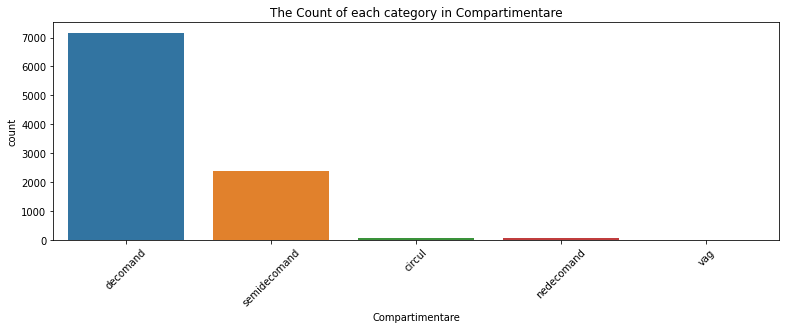

Number of unique values in Compartimentare is: 6
decomand        74.136505
semidecomand    24.539814
circul           0.775595
nedecomand       0.537746
vag              0.010341
Name: Compartimentare, dtype: float64


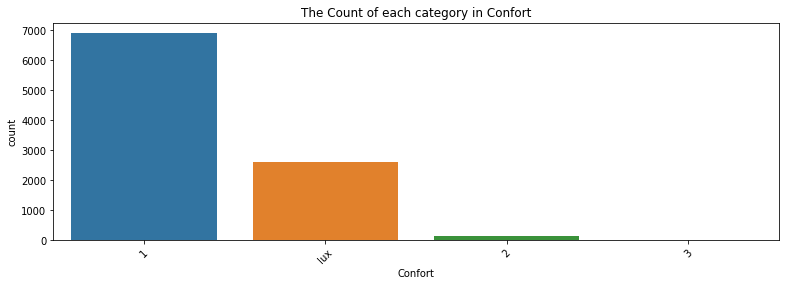

Number of unique values in Confort is: 5
1      71.554313
lux    27.037382
2       1.252977
3       0.155328
Name: Confort, dtype: float64


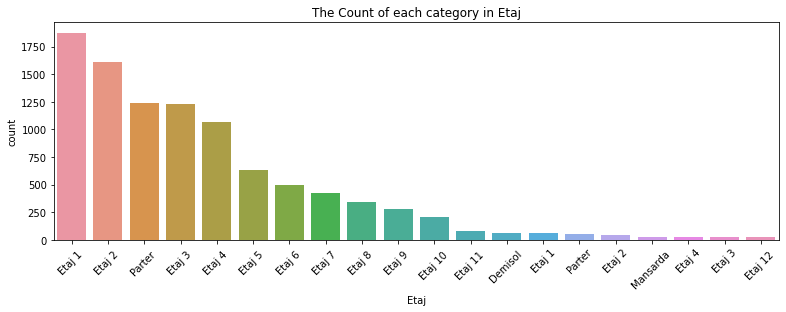

Number of unique values in Etaj is: 41
Etaj 1               18.867545
Etaj 2               16.182239
Parter               12.440913
Etaj 3               12.370512
Etaj 4               10.751282
Etaj 5                6.336116
Etaj 6                5.038721
Etaj 7                4.254249
Etaj 8                3.489892
Etaj 9                2.836166
Etaj 10               2.061752
Etaj 11               0.804586
Demisol               0.663784
Etaj 1                0.633612
Parter                0.512924
Etaj 2                0.442522
Mansarda              0.301720
Etaj 4                0.261490
Etaj 3                0.251433
Etaj 12               0.231319
Ultimele 2 etaje      0.201147
Etaj 5                0.160917
Etaj 7                0.140803
Etaj 8                0.140803
Etaj 6                0.100573
Etaj 14               0.090516
Etaj 10               0.070401
Etaj 15               0.060344
Etaj 13               0.060344
Etaj 11               0.050287
Mansarda              0.030172


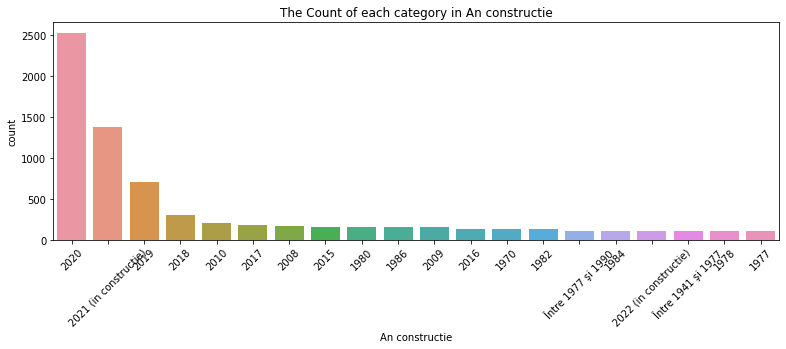

Number of unique values in An constructie is: 122
2020                     25.929339
2021 (in constructie)    14.080901
2019                      7.291347
2018                      3.051715
2010                      2.130056
2017                      1.833077
2008                      1.740911
2015                      1.669227
1980                      1.628264
1986                      1.607783
2009                      1.556580
2016                      1.382488
1970                      1.362007
1982                      1.331285
Între 1977 şi 1990        1.157194
1984                      1.136713
2022 (in constructie)     1.126472
Între 1941 şi 1977        1.116231
1978                      1.105991
1977                      1.085509
1985                      1.044547
2014                      1.024066
2012                      0.993344
2021 (finalizata)         0.983103
1976                      0.952381
2007                      0.880696
2011                      0.849974
1940 

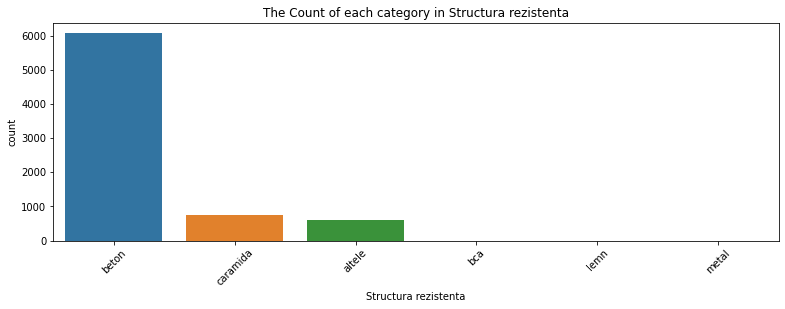

Number of unique values in Structura rezistenta is: 7
beton       81.899110
caramida     9.954141
altele       8.065821
bca          0.026976
lemn         0.026976
metal        0.026976
Name: Structura rezistenta, dtype: float64


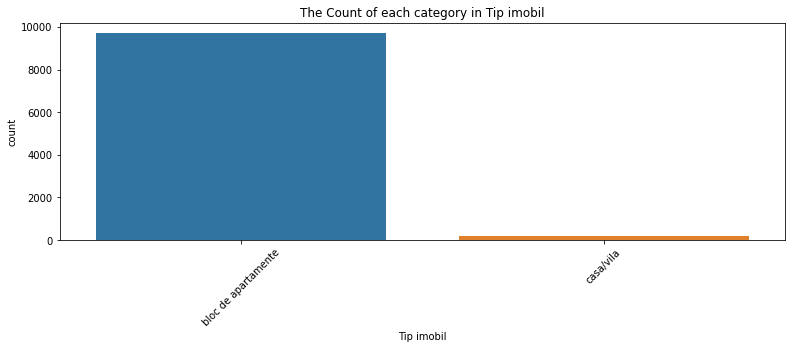

Number of unique values in Tip imobil is: 3
bloc de apartamente    98.111302
casa/vila               1.888698
Name: Tip imobil, dtype: float64


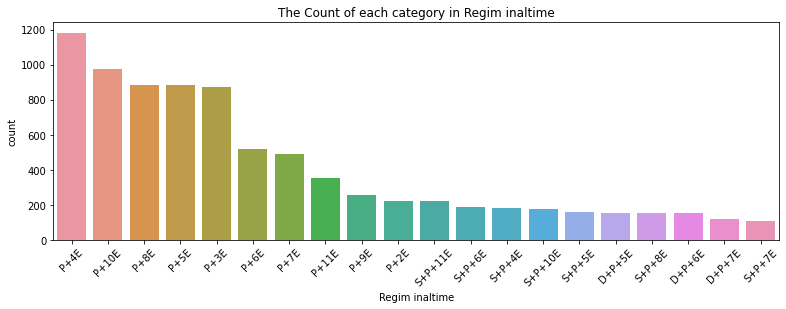

Number of unique values in Regim inaltime is: 111
P+4E           12.176780
P+10E          10.013392
P+8E            9.086226
P+5E            9.086226
P+3E            8.983208
P+6E            5.367261
P+7E            5.047904
P+11E           3.626249
P+9E            2.616668
P+2E            2.266406
S+P+11E         2.256104
S+P+6E          1.905841
S+P+4E          1.885237
S+P+10E         1.813125
S+P+5E          1.648295
D+P+5E          1.596786
S+P+8E          1.576182
D+P+6E          1.565880
D+P+7E          1.205316
S+P+7E          1.122901
P+12E           1.081694
D+P+4E          0.896260
S+P+3E          0.844751
D+P+8E          0.813846
D+P+3E          0.752035
S+P+12E         0.731431
P+2E+M          0.700525
S+P+9E          0.576903
P+3E+M          0.525394
P+1E            0.401772
S+P+2E+M        0.391470
P+5E+M          0.298753
D+P+11E         0.298753
S+P             0.288452
D+P+10E         0.278150
D+P+2E          0.247244
S+P+3E+M        0.247244
P+16E           0.247244


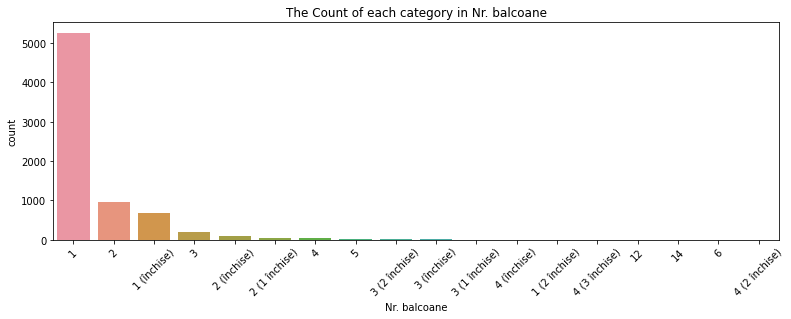

Number of unique values in Nr. balcoane is: 19
1                71.782988
2                13.154308
1 (închise)       9.405671
3                 2.603599
2 (închise)       1.281352
2 (1 închise)     0.545256
4                 0.531625
5                 0.163577
3 (2 închise)     0.136314
3 (închise)       0.122683
3 (1 închise)     0.095420
4 (închise)       0.054526
1 (2 închise)     0.040894
4 (3 închise)     0.027263
12                0.013631
14                0.013631
6                 0.013631
4 (2 închise)     0.013631
Name: Nr. balcoane, dtype: float64


In [12]:
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'object']
print('There are {} categorical variables in our dataset.'.format(len(categorical_features)))


for feature in categorical_features:
    plt.figure(figsize=(13, 4))
    sns.countplot(feature, data=df_copy, order=df_copy[feature].value_counts().iloc[:20].index)
    plt.title('The Count of each category in {}'.format(feature))
    plt.xticks(rotation=45)
    plt.show()
    print('Number of unique values in {0} is: {1}'.format(feature, len(df_copy[feature].unique())))
    print(df_copy[feature].value_counts(normalize=True) * 100)

## 2. Numerical Variables

With regards to numerical variables, we will try to deduce some statistical details i.e. the central tendency (where the center of our data is) and measures of dispersion (how spread the data are). Mean, median and mode are the 3 central tendency measures. Mean is commonly used but very sensitive to extreme values, median however, is expected to be utilized in such cases. Mode should be applied for categorical data. Variance and standard deviation explain the spread of data around a central value. Represented below are the count, mean, standard deviation, and the 5 quartiles of each independent numerical variable. 

In [13]:
df_copy.describe()

,Nr camere,Suprafata utila,Suprafata utila totala,Suprafata construita,Nr. bucatarii,Nr. bai,Nr. garaje,Nr. locuri parcare,Latitudine:,Longitudine:,Pret
count,9942.000000,9881.000000,3523.000000,8889.000000,8373.000000,9460.000000,505.000000,2480.000000,9943.000000,9943.000000,9.943000e+03
mean,2.457353,72.611934,77.916966,89.228113,1.008480,1.435941,1.372277,1.556855,44.438983,26.098274,1.345962e+05
std,0.943821,40.583849,155.227709,58.424597,0.183009,0.656937,3.597291,5.338935,0.041602,0.053824,1.922772e+05
min,1.000000,4.064000,15.000000,1.092000,1.000000,1.000000,1.000000,1.000000,43.882717,25.613881,2.500000e+02
25%,2.000000,50.360000,53.000000,60.000000,1.000000,1.000000,1.000000,1.000000,44.412752,26.065248,6.200000e+04
50%,2.000000,63.000000,63.300000,74.000000,1.000000,1.000000,1.000000,1.000000,44.436962,26.106021,8.690000e+04
75%,3.000000,82.000000,84.000000,98.000000,1.000000,2.000000,1.000000,1.000000,44.465390,26.131860,1.395000e+05
max,15.000000,621.000000,8866.000000,916.800000,12.000000,11.000000,58.000000,99.000000,44.728872,26.509722,6.000000e+06


Also, we would like to see how the distribution our data falls under presents itself. Many numerical variables contain outliers (extreme values that could negatively impact statistical analysis). To visualise this, we will be utilizing Histograms and Box-And-Whiskers plots a.k.a Box plots. Box plots are composed of 5 stages, mentioned previously, which statistically explain the data, these are: minimum value, 1st quartile, median, 3rd quartile, and maximum value. Most importantly, box plots reveal the outliers of our data as well. We can clearly see that many of our numerical variables contain outliers. Fully understanding the negative impacts of outliers will prove to be a valuable skill in deciding what the solution for treating them should be:

- Outliers increase residual error 
- Outliers decrease power of statistical tests
- Outliers may decrease normality
-  Outliers may impact the assumptions of Regression



There are 11 numerical variables in our dataset.


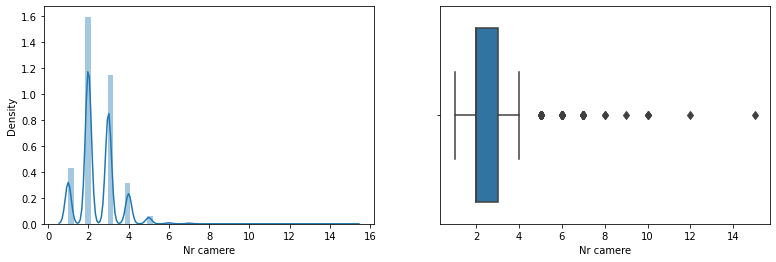

<Figure size 936x288 with 0 Axes>

Number of unique values in Nr camere is: 13


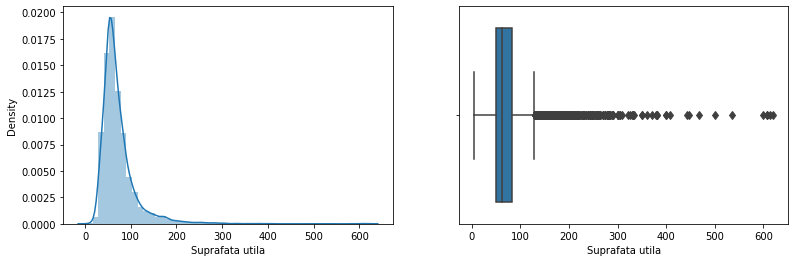

<Figure size 936x288 with 0 Axes>

Number of unique values in Suprafata utila is: 1512


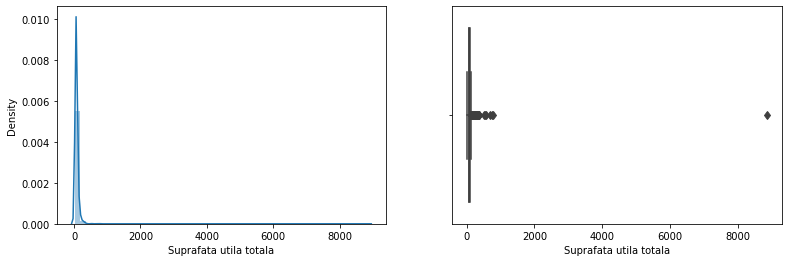

<Figure size 936x288 with 0 Axes>

Number of unique values in Suprafata utila totala is: 743


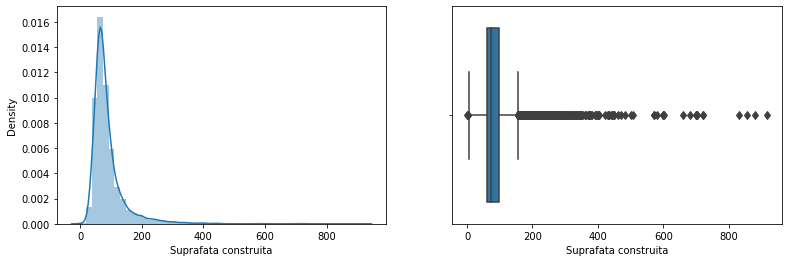

<Figure size 936x288 with 0 Axes>

Number of unique values in Suprafata construita is: 1304


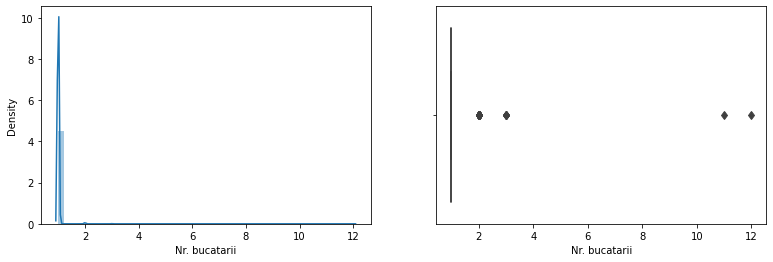

<Figure size 936x288 with 0 Axes>

Number of unique values in Nr. bucatarii is: 6


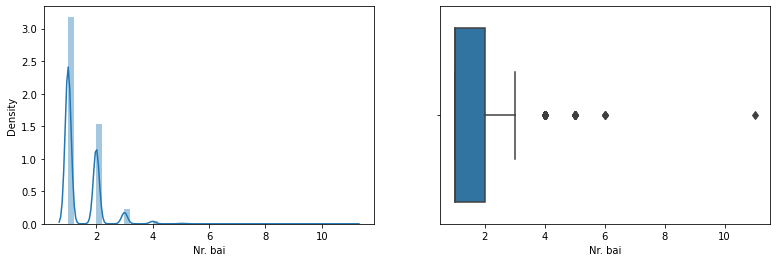

<Figure size 936x288 with 0 Axes>

Number of unique values in Nr. bai is: 8


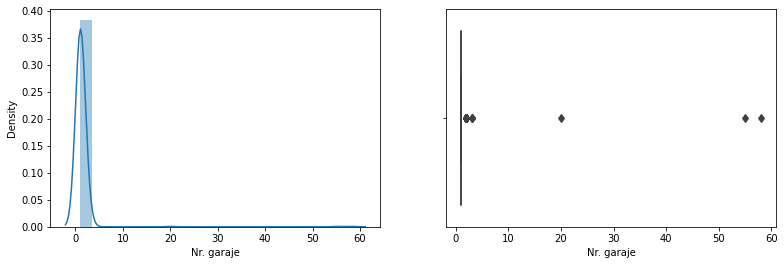

<Figure size 936x288 with 0 Axes>

Number of unique values in Nr. garaje is: 7


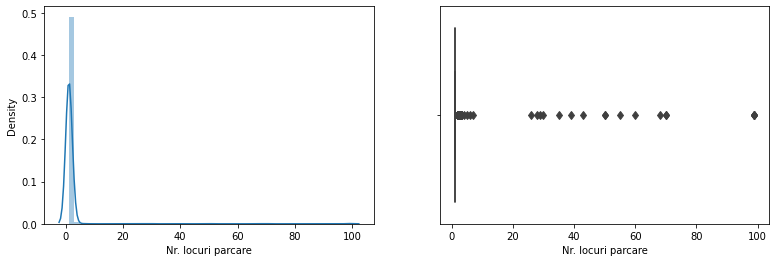

<Figure size 936x288 with 0 Axes>

Number of unique values in Nr. locuri parcare is: 21


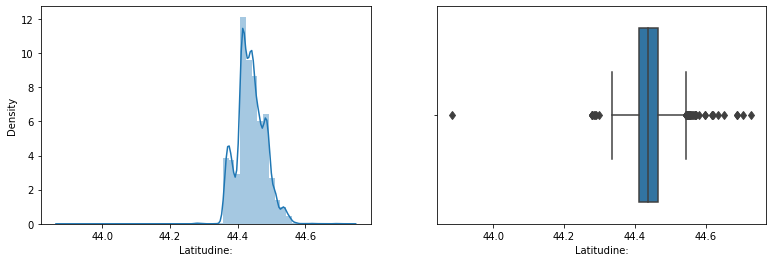

<Figure size 936x288 with 0 Axes>

Number of unique values in Latitudine: is: 8910


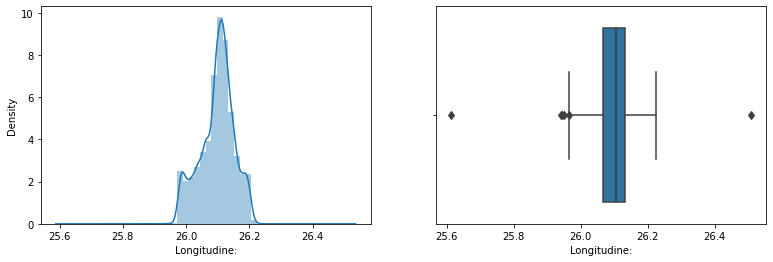

<Figure size 936x288 with 0 Axes>

Number of unique values in Longitudine: is: 8931


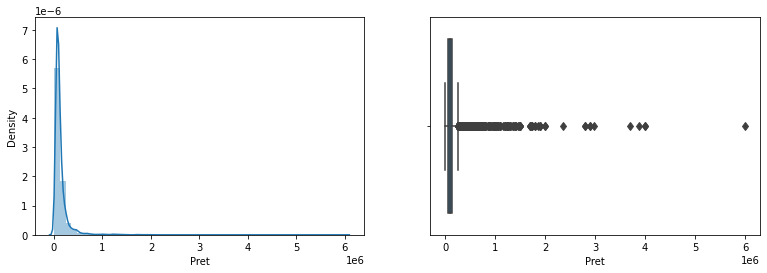

<Figure size 936x288 with 0 Axes>

Number of unique values in Pret is: 2172


In [14]:
numerical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'object']
print('There are {} numerical variables in our dataset.'.format(len(numerical_features)))

for feature in numerical_features:
    fig, ax = plt.subplots(ncols = 2, figsize=(13, 4))
    plt.figure(figsize=(13, 4))
    sns.distplot(df_copy[feature], ax=ax[0])
    sns.boxplot(df_copy[feature], ax=ax[1], fliersize=6)
    plt.show()
    print('Number of unique values in {0} is: {1}'.format(feature, len(df_copy[feature].unique()))) 